# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents **17** marketing campaigns.

> The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts. During these
phone campaigns, an attractive long-term deposit
application, with good interest rates, was offered. For each
contact, a large number of attributes was stored (e.g. see
Table 2) and if there was a success (the target variable).
For the whole database considered, there were 6499
successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [157]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Understand Numeric Features

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


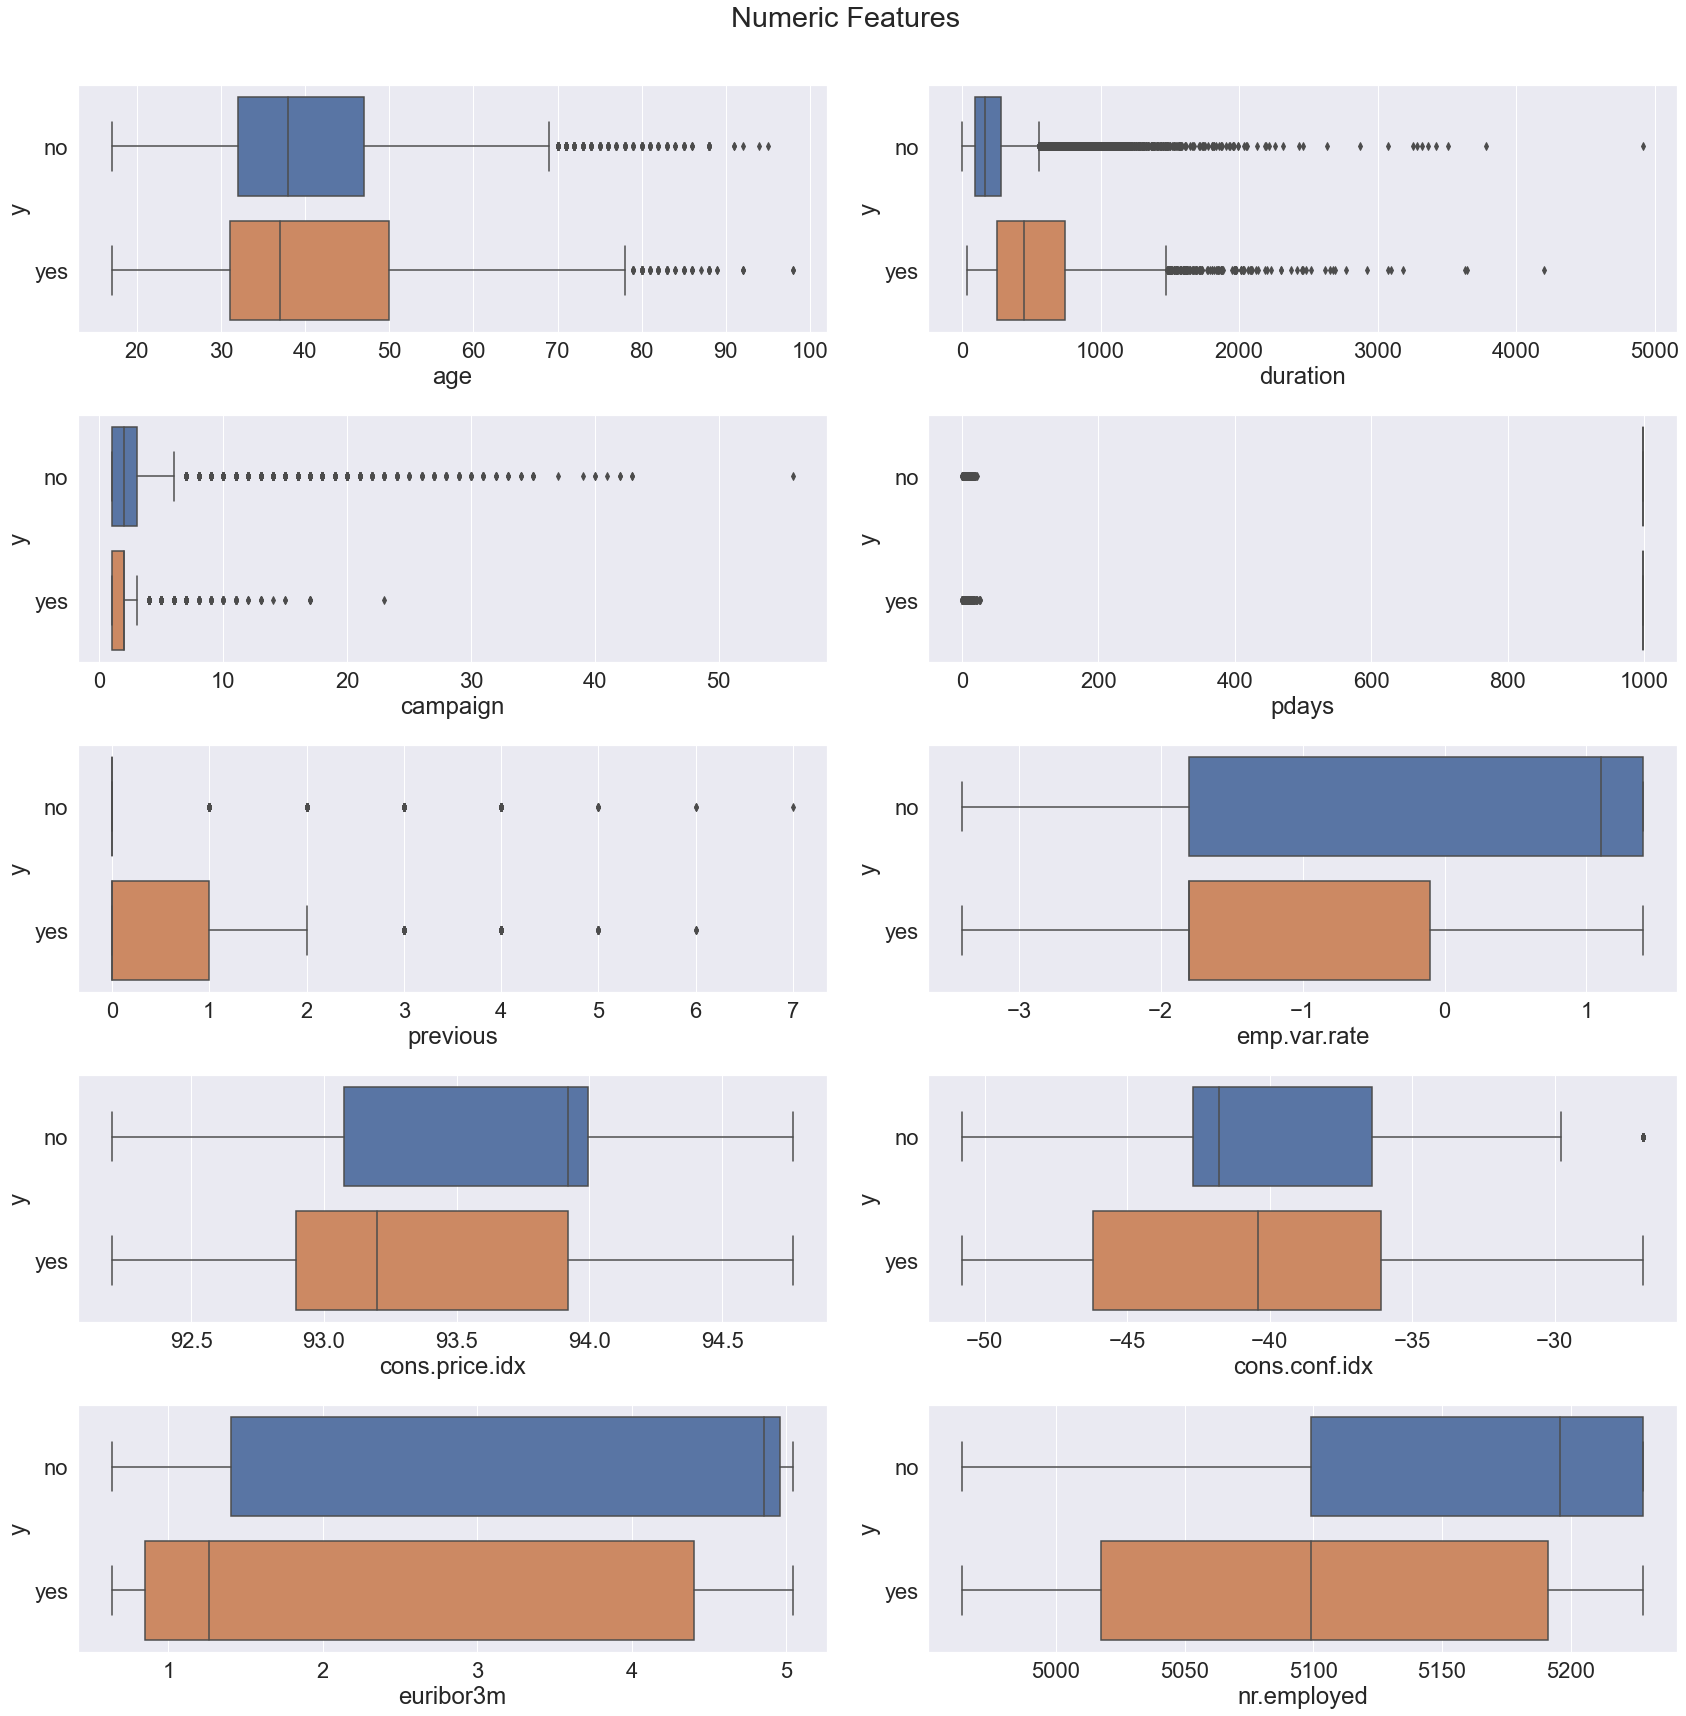

In [269]:
# Box plots for numeric features
sns.set(font_scale = 2)

fig, ax = plt.subplots(5, 2, figsize=(24,24))
fig.suptitle('Numeric Features', y=1.)


sns.boxplot(x=df['age'], y=df['y'], ax=ax[0,0])
sns.boxplot(x=df['duration'], y=df['y'], ax=ax[0,1])
sns.boxplot(x=df['campaign'], y=df['y'], ax=ax[1,0])
sns.boxplot(x=df['pdays'], y=df['y'], ax=ax[1,1])
sns.boxplot(x=df['previous'], y=df['y'], ax=ax[2,0])
sns.boxplot(x=df['emp.var.rate'], y=df['y'], ax=ax[2,1])
sns.boxplot(x=df['cons.price.idx'], y=df['y'], ax=ax[3,0])
sns.boxplot(x=df['cons.conf.idx'], y=df['y'], ax=ax[3,1])
sns.boxplot(x=df['euribor3m'], y=df['y'], ax=ax[4,0])
sns.boxplot(x=df['nr.employed'], y=df['y'], ax=ax[4,1])

fig.tight_layout()

#### Understand Categorical Features

In [16]:
# Let's discover the unique counts on the object columns
unique_counts_df = pd.DataFrame(columns=['feature', 'unique_count'])

for column in df.select_dtypes(include='object').columns:
    unique_counts_df.loc[len(unique_counts_df.index)] = [column, df[column].nunique()] 
    
unique_counts_df

,feature,unique_count
0,job,12
1,marital,4
2,education,8
3,default,3
4,housing,3
5,loan,3
6,contact,2
7,month,10
8,day_of_week,5
9,poutcome,3


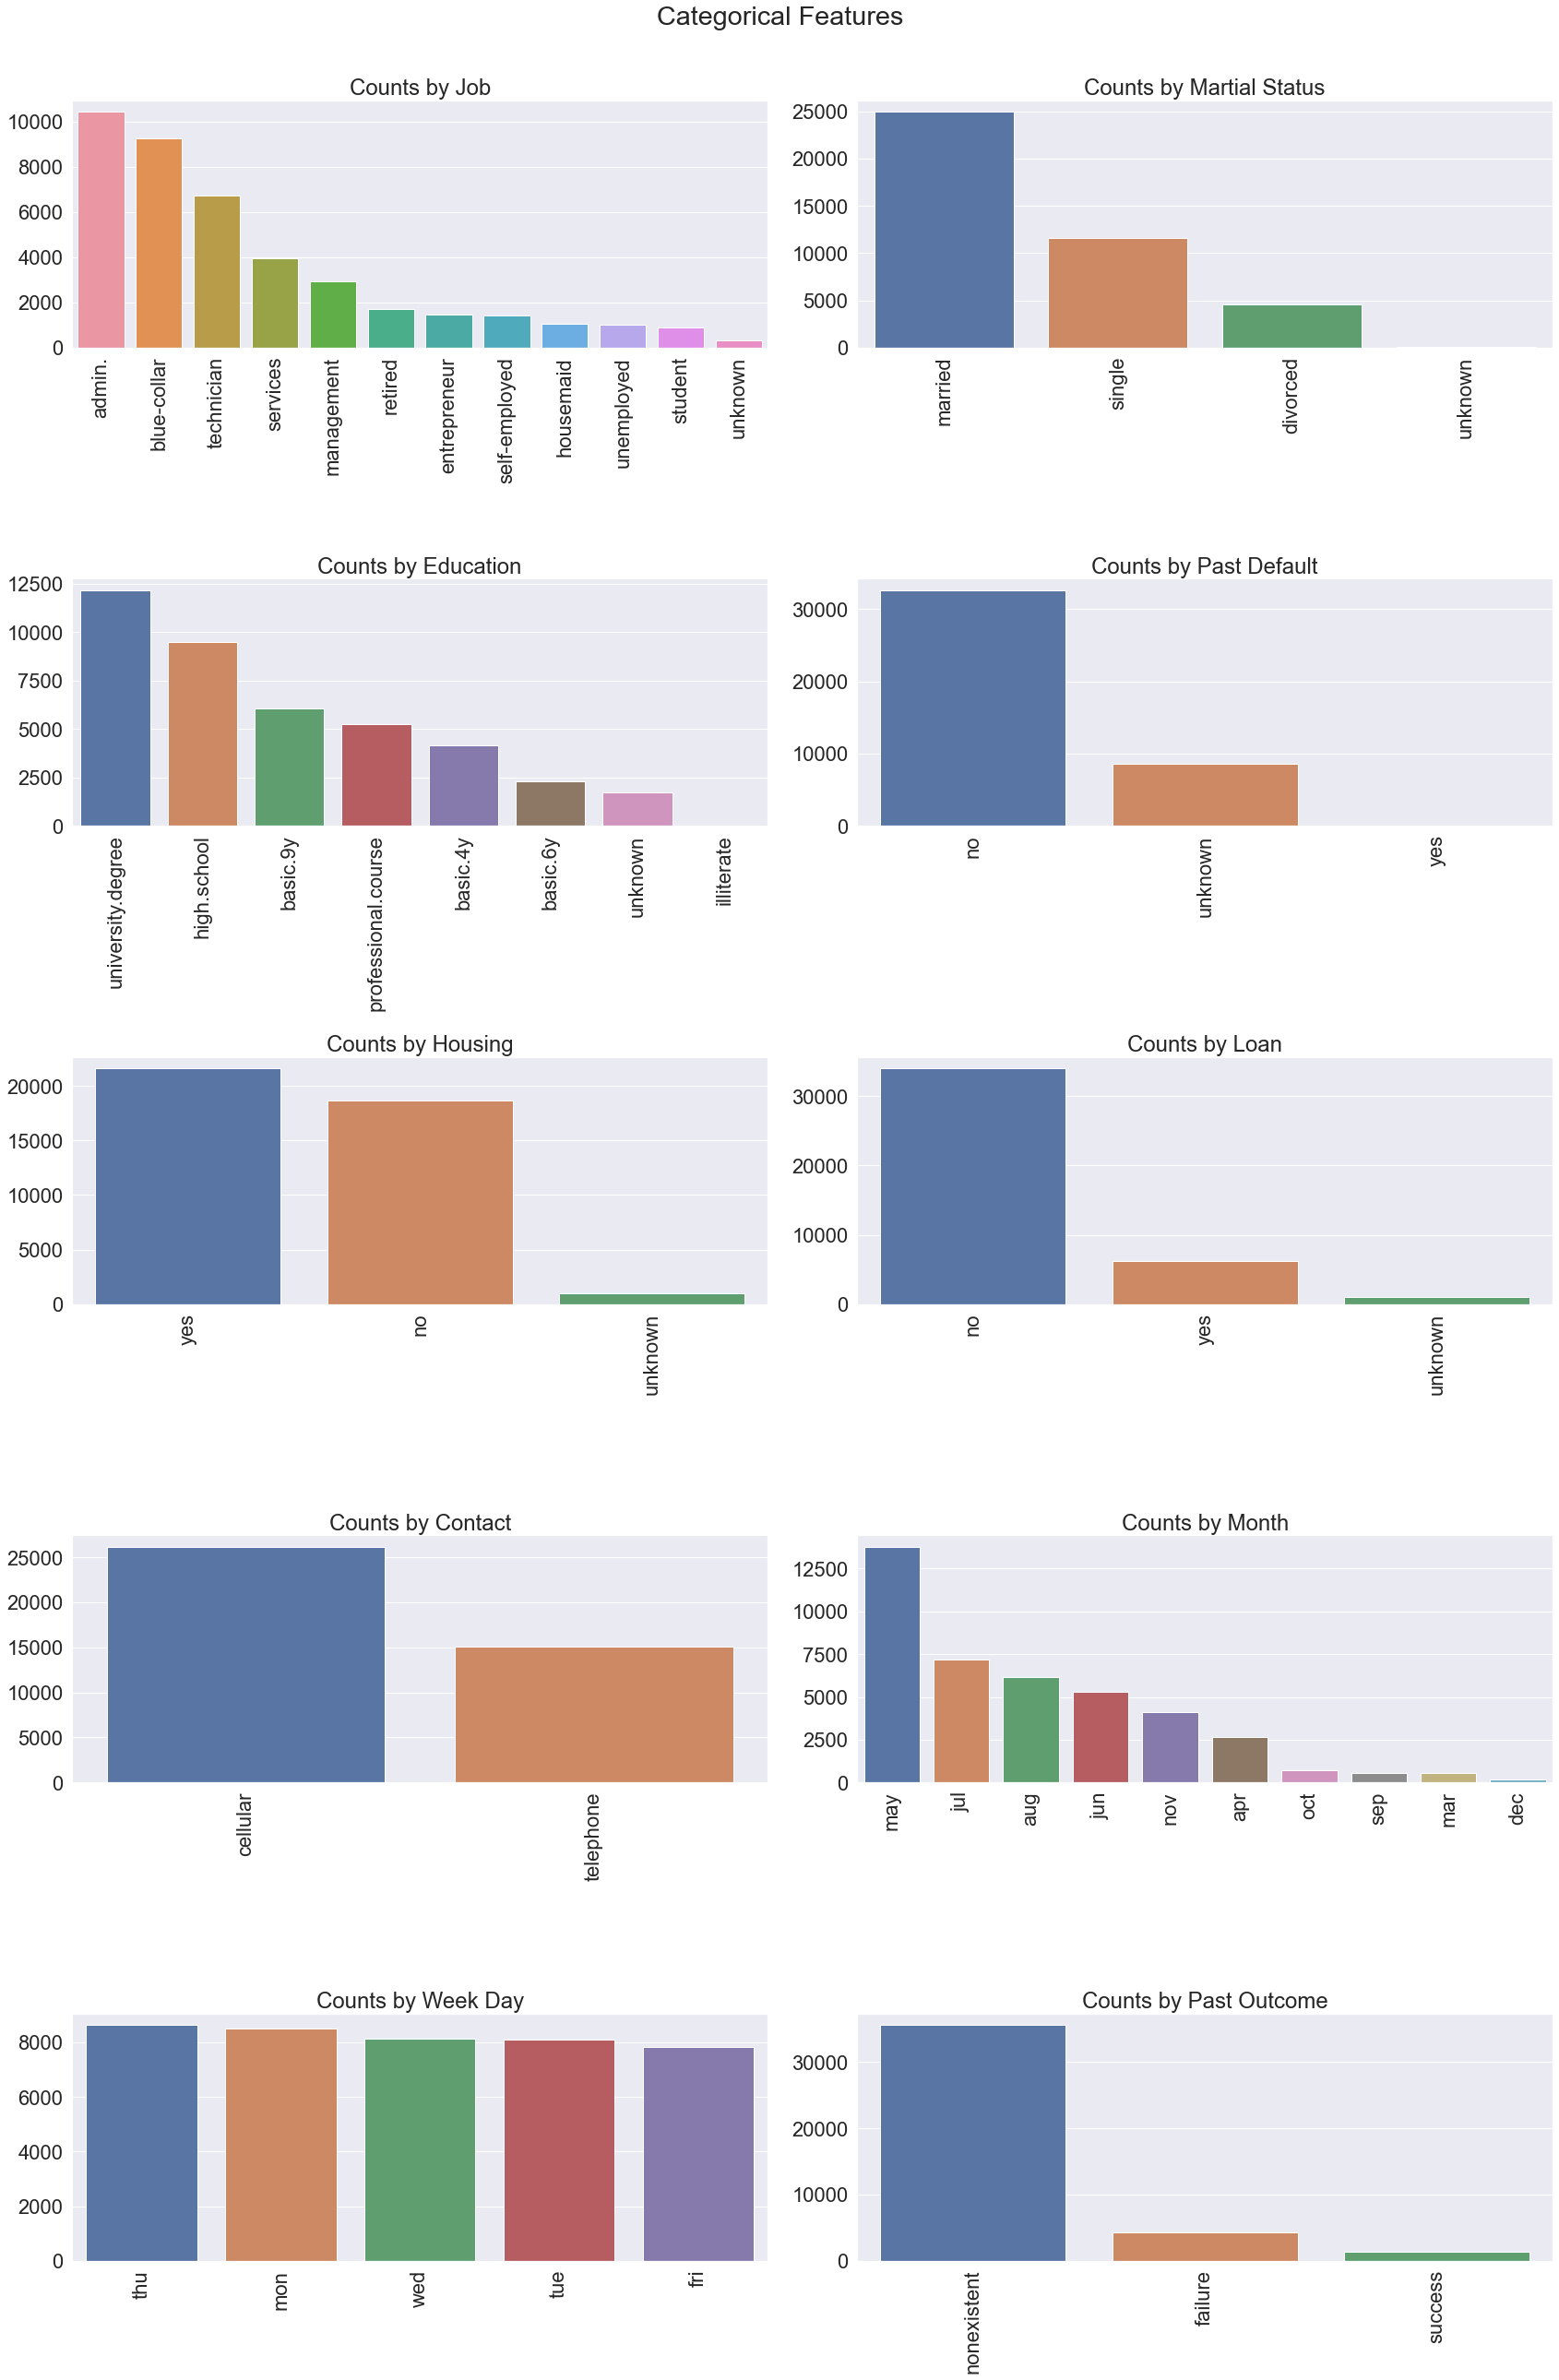

In [21]:
fig, ax = plt.subplots(5, 2, figsize=(24,36))
fig.suptitle('Categorical Features', y=1.)

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df, ax=ax[plot_x, plot_y], order = df[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)
    
add_subplot('job',0,0,"Counts by Job")
add_subplot('marital',0,1,"Counts by Martial Status")
add_subplot('education',1,0,"Counts by Education")
add_subplot('default',1,1,"Counts by Past Default")
add_subplot('housing',2,0,"Counts by Housing")
add_subplot('loan',2,1,"Counts by Loan")
add_subplot('contact',3,0,"Counts by Contact")
add_subplot('month',3,1,"Counts by Month")
add_subplot('day_of_week',4,0,"Counts by Week Day")
add_subplot('poutcome',4,1,"Counts by Past Outcome")

fig.tight_layout()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

*Business Objective* of the task is to identify a model that can successfully predict whether a client will subscribe to the term deposit given a set of features. Also determine which features have the most impact on clients decision to subscribe to the term deposit.

> The business goal is to find a model that can explain success of a contact, i.e.
if the client subscribes the deposit. Such model can
increase campaign efficiency by identifying the main
characteristics that affect success, helping in a better
management of the available resources (e.g. human effort,
phone calls, time) and selection of a high quality and
affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [314]:
df_bank_info = df.iloc[: , :7]
df_bank_info['y'] = df['y']

In [315]:
df_bank_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [316]:
df_bank_info.shape

(41188, 8)

#### Explore and Engineer Numeric Features

Please refer to this [stackoverflow](https://stackoverflow.com/a/23202269/115278) link and [Z-Score, Z-Table transformations](https://sixsigmastudyguide.com/z-scores-z-table-z-transformations/) for more details on how we are removing outliers

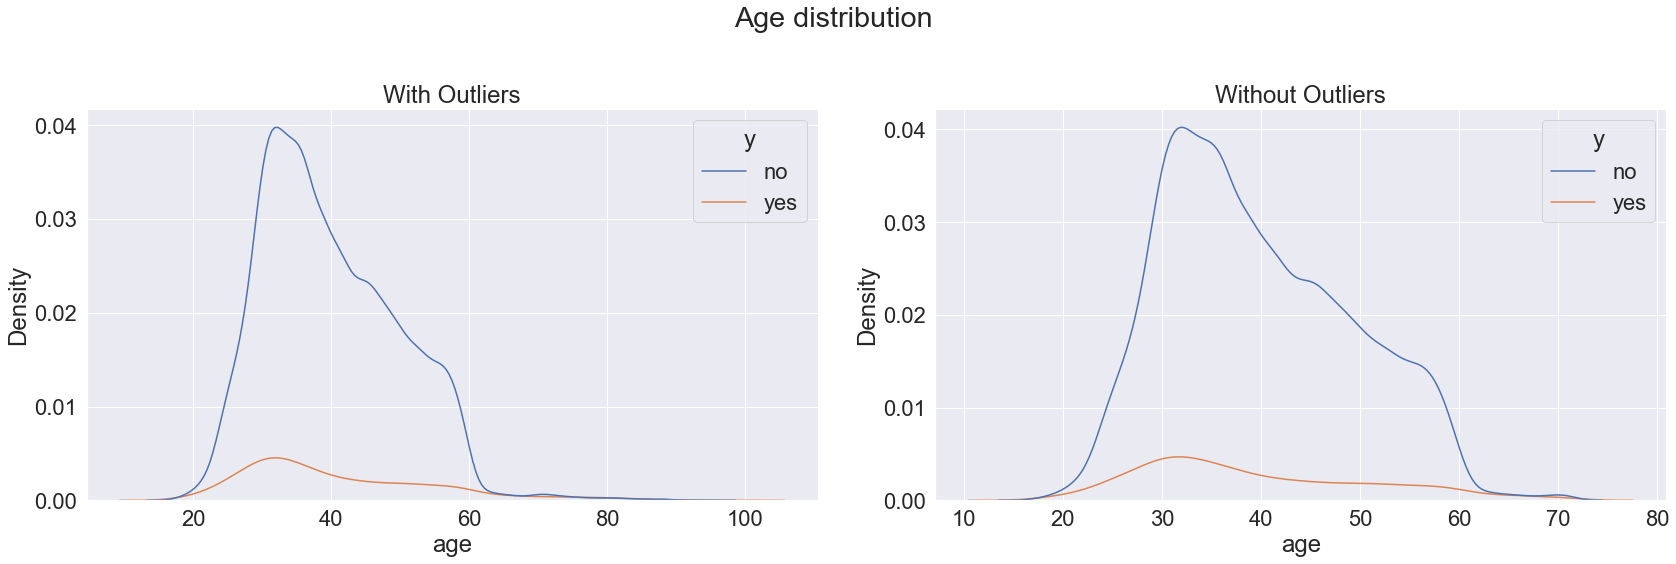

In [317]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('Age distribution', y=1.)
    
plot0 = sns.kdeplot(data=df_bank_info,x='age',hue="y",ax=ax[0])
plot0.set_title('With Outliers')

# Remove outliers 
df_bank_info = df_bank_info[(np.abs(stats.zscore(df_bank_info['age'])) < 3)]

plot1 = sns.kdeplot(data=df_bank_info,x='age',hue="y",ax=ax[1])
plot1.set_title('Without Outliers')
fig.tight_layout()

#### Explore and Engineer Categorical Features

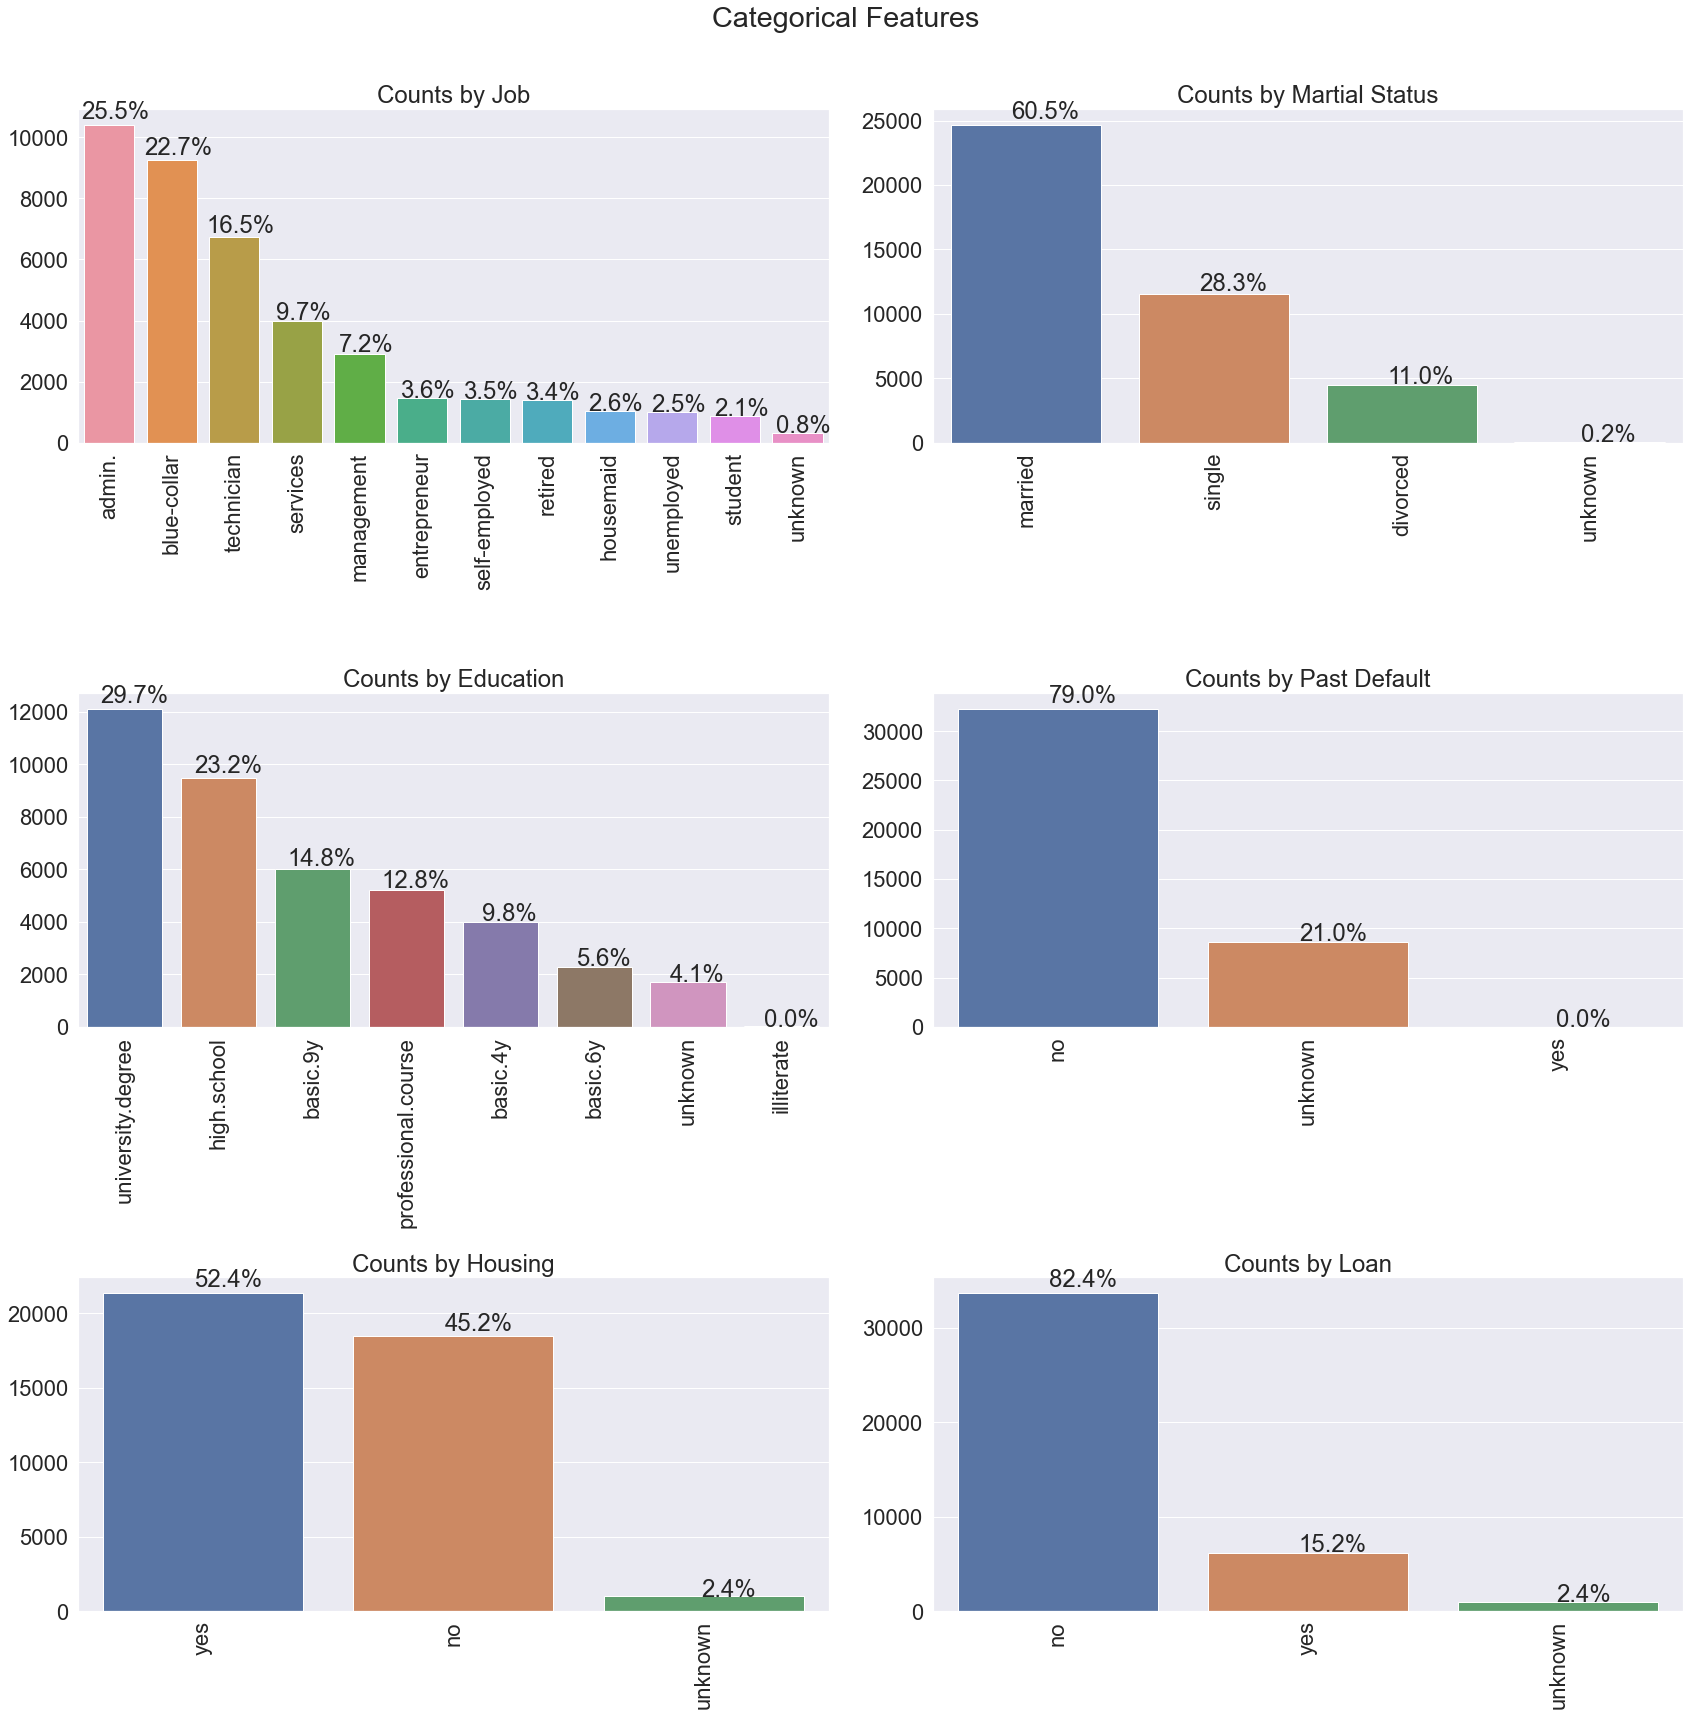

In [318]:
fig, ax = plt.subplots(3, 2, figsize=(24,24))
fig.suptitle('Categorical Features', y=1.)
total = float(len(df_bank_info))

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df_bank_info, ax=ax[plot_x, plot_y], 
                         order = df_bank_info[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.5
        y = p.get_height() + p.get_height() * 0.02
        plot.annotate(percentage,(x, y),ha='center')

add_subplot('job',0,0,"Counts by Job")
add_subplot('marital',0,1,"Counts by Martial Status")
add_subplot('education',1,0,"Counts by Education")
add_subplot('default',1,1,"Counts by Past Default")
add_subplot('housing',2,0,"Counts by Housing")
add_subplot('loan',2,1,"Counts by Loan")

fig.tight_layout()

To simplify and reduce dimensionality for each feature

* **Education** - Let us remove the 'illeterate' category which is '0.0%'

In [319]:
df_bank_info = df_bank_info[~(df_bank_info['education'].isin(['illiterate']))]

* **Past Default** - Let us remove the 'yes' category which is '0.0%'

In [320]:
df_bank_info = df_bank_info[~(df_bank_info['default'].isin(['yes']))]

* Every column except **default** let us mark 'unknown' as NaN

In [321]:
for col in ['job','marital','education','housing','loan']:
    df_bank_info[col] = np.where(df_bank_info[col]=='unknown', np.nan, df_bank_info[col]) 

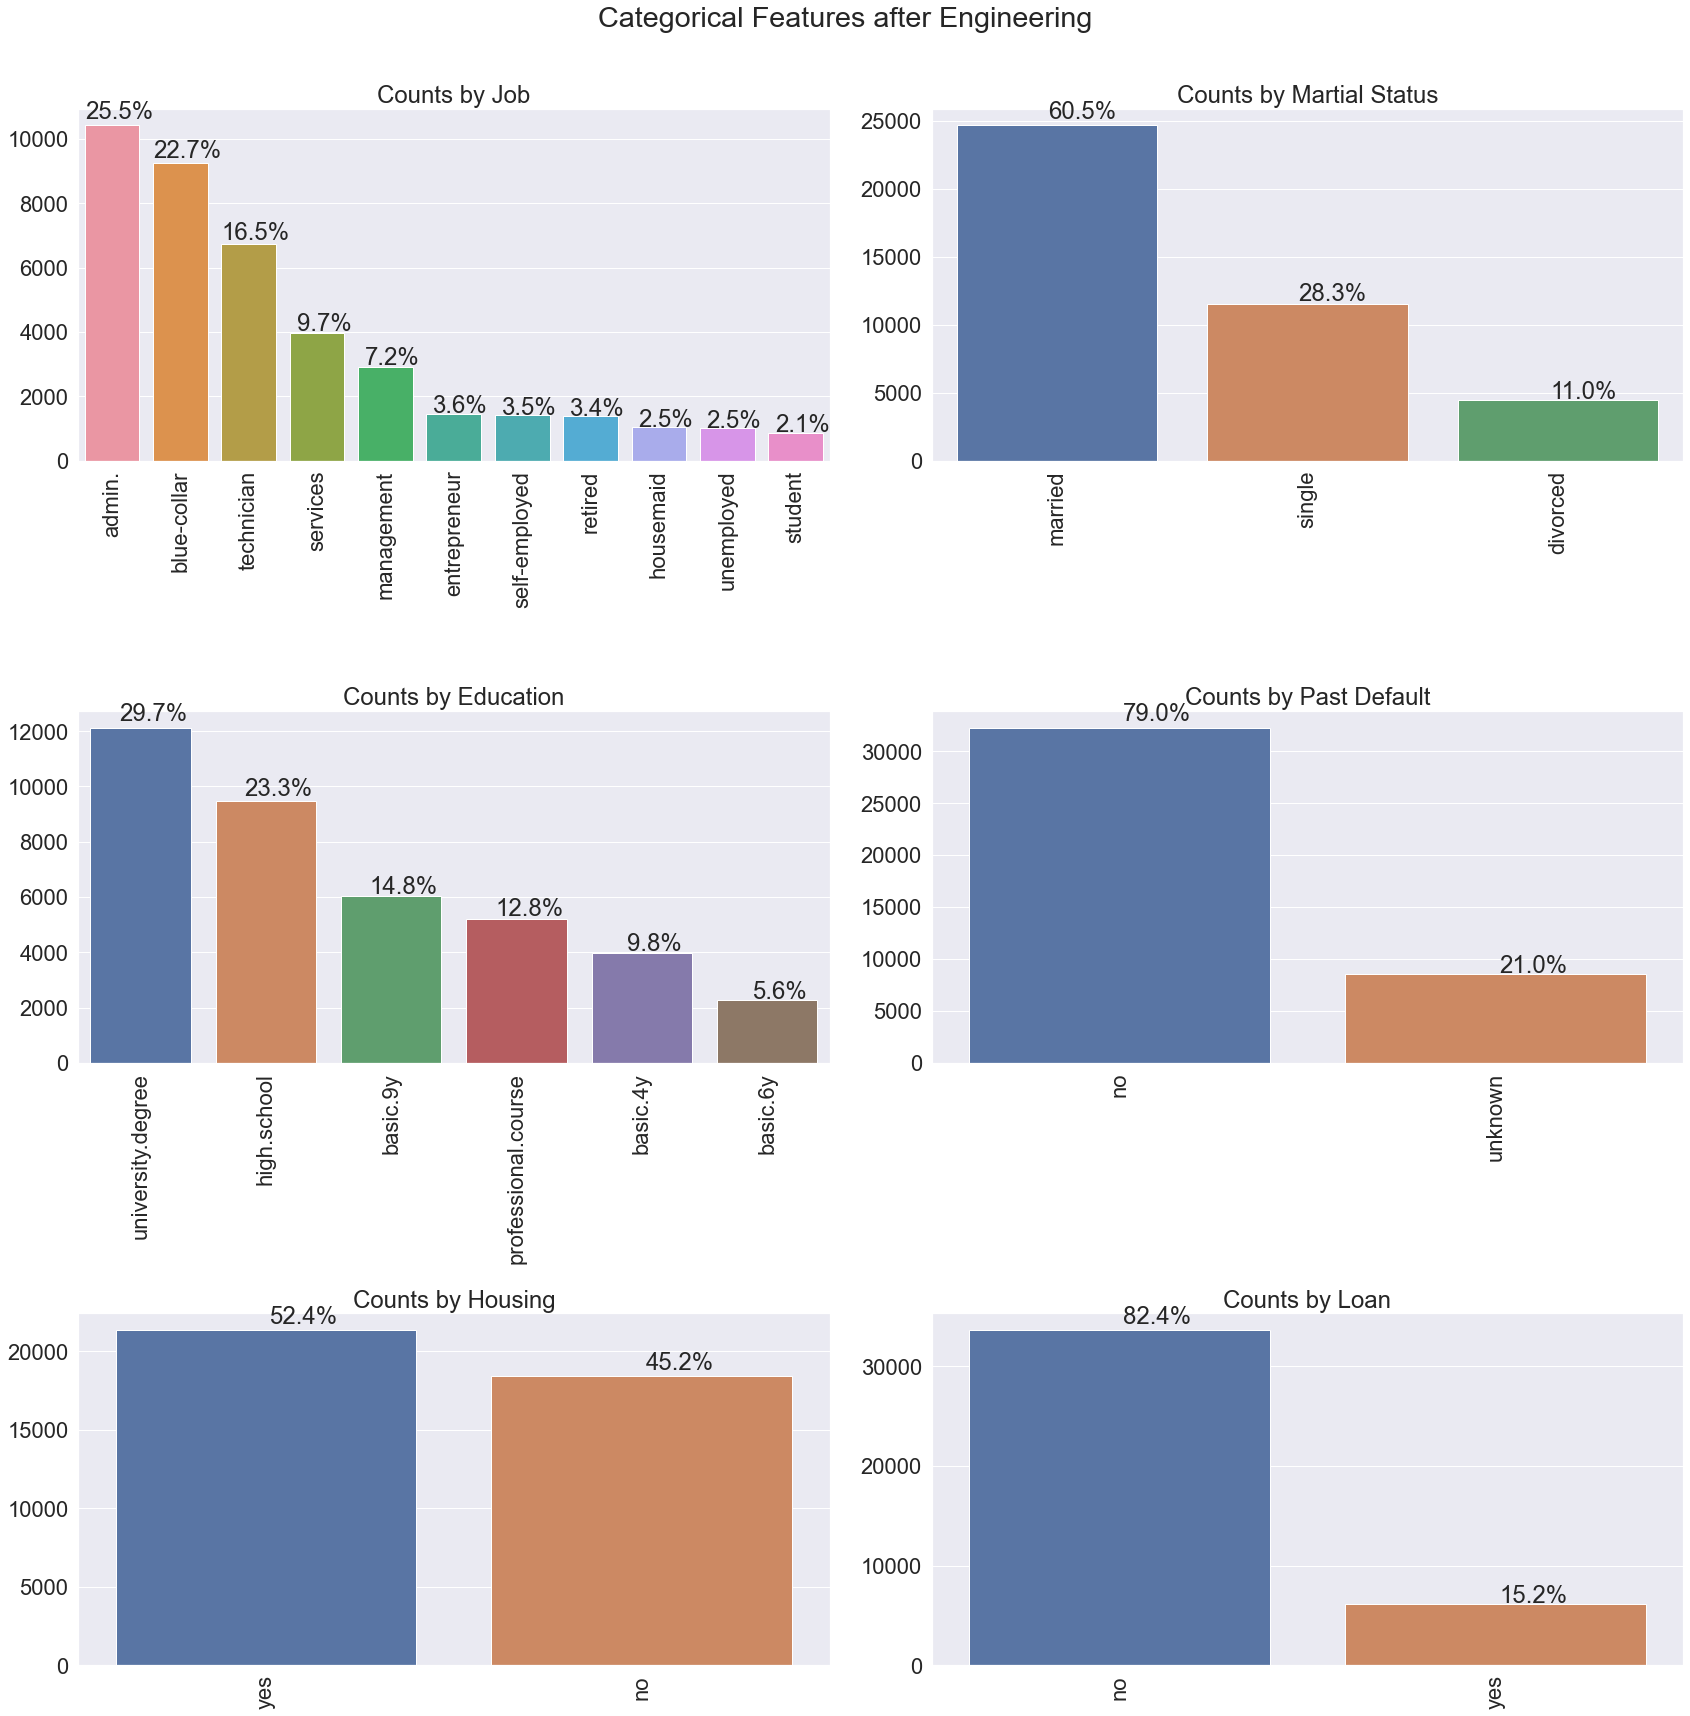

In [322]:
fig, ax = plt.subplots(3, 2, figsize=(24,24))
fig.suptitle('Categorical Features after Engineering', y=1.)
total = float(len(df_bank_info))

add_subplot('job',0,0,"Counts by Job")
add_subplot('marital',0,1,"Counts by Martial Status")
add_subplot('education',1,0,"Counts by Education")
add_subplot('default',1,1,"Counts by Past Default")
add_subplot('housing',2,0,"Counts by Housing")
add_subplot('loan',2,1,"Counts by Loan")

fig.tight_layout()

#### Explore and Engineer - Target feature

In [323]:
df_bank_info['y'] = df_bank_info['y'].replace({'yes':1, 'no':0})

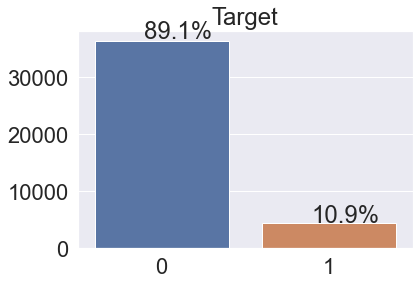

In [324]:
plot = sns.countplot(x='y', data=df_bank_info, order = df_bank_info['y'].value_counts().index);
plot.set_title('Target')
plot.set(xlabel=None, ylabel=None)
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.5
    y = p.get_height() + p.get_height() * 0.01
    plot.annotate(percentage, (x, y),ha='center')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [325]:
X = df_bank_info.drop(columns=['y'])
y = df_bank_info['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(f'{df_bank_info.shape}')
print(f'{X_train.shape},{X_test.shape}')
print(f'{y_train.shape},{y_test.shape}')

(40799, 8)
(30599, 7),(10200, 7)
(30599,),(10200,)


### Utility Functions

In [407]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import time
import warnings
warnings.filterwarnings('ignore')

numeric_columns = list(X_train.select_dtypes(include='number').columns)
numeric_columns_transformer = Pipeline(
    steps = [
        ('scaler', MinMaxScaler())
    ]
)

object_columns = list(X_train.select_dtypes(include='object').columns)
object_columns_transformer = Pipeline(
    steps = [
        ('encoder', TargetEncoder(handle_unknown='return_nan', handle_missing='return_nan')),
        ('imputer', IterativeImputer(n_nearest_features=3, sample_posterior=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric',numeric_columns_transformer,numeric_columns),
        ('object',object_columns_transformer,object_columns)
    ]
)

In [408]:
def to_binary(series):
    series[series <= 0.5] = 0
    series[series > 0.5] = 1
    return series

def build_and_score_model(pipeline, title):
    start = time.time()
    pipeline.fit(X_train, y_train)
    stop = time.time()

    y_pred_train = pipeline.predict(X_train)
    y_pred_train = to_binary(y_pred_train)

    y_pred = pipeline.predict(X_test)
    y_pred = to_binary(y_pred)

    print('Train Accuracy Score: %0.5f' % accuracy_score(y_train, y_pred_train))
    print('Test Accuracy Score: %0.5f' % accuracy_score(y_test, y_pred))
    print('Fit Time: %0.5fs' % (stop-start))
    sns.set(font_scale = 1.2)

    # plot the confusion matrix 
    fig, ax = plt.subplots(2, 2,figsize=(18, 12))
    fig.suptitle(title, size=16)

    ax[0][0].set_title("Test Data", size=12)
    ax[0][0].grid(False)
    ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred,ax=ax[0][0])

    ax[0][1].set_title("Training Data", size=12)
    ax[0][1].grid(False)
    ConfusionMatrixDisplay.from_predictions(y_true=y_train,y_pred=y_pred_train,ax=ax[0][1])
    
    ax[1][0].grid(False)
    sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).iloc[:-1, :].T, 
                cmap='Pastel1', annot=True, ax=ax[1][0])
    
    ax[1][1].grid(False)
    sns.heatmap(pd.DataFrame(classification_report(y_train, y_pred_train,output_dict=True)).iloc[:-1, :].T, 
                cmap='Pastel1', annot=True, ax=ax[1][1])
    plt.show()
    
    ## Print feature importances if coef is available
    if hasattr(pipeline.named_steps['model'], 'coef_'):
        feature_names = list(pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out()) + \
                    pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].cols
        df_coeffs = pd.DataFrame({'features':feature_names,"importance":pipeline.named_steps['model'].coef_.tolist()[0]})


        fig, ax = plt.subplots(1, 1,figsize=(18, 6))
        fig.suptitle("Features by Importance", size=16)

        ax.grid(False)
        ax.set(xlabel=None, ylabel=None)
        sns.barplot(data=df_coeffs.sort_values('importance',ascending=False), x="importance", y="features", ax=ax)
    
    plt.show()
    fig.tight_layout()

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Train Accuracy Score: 0.89121
Test Accuracy Score: 0.88951
Fit Time: 3.50629s


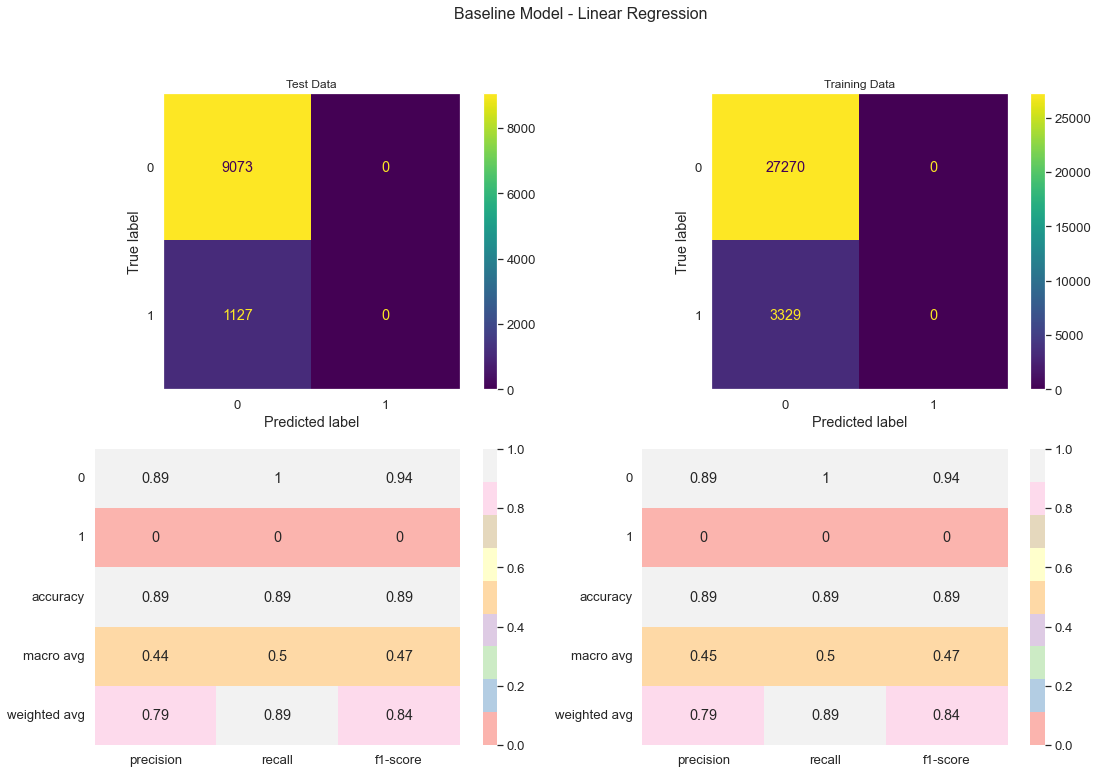

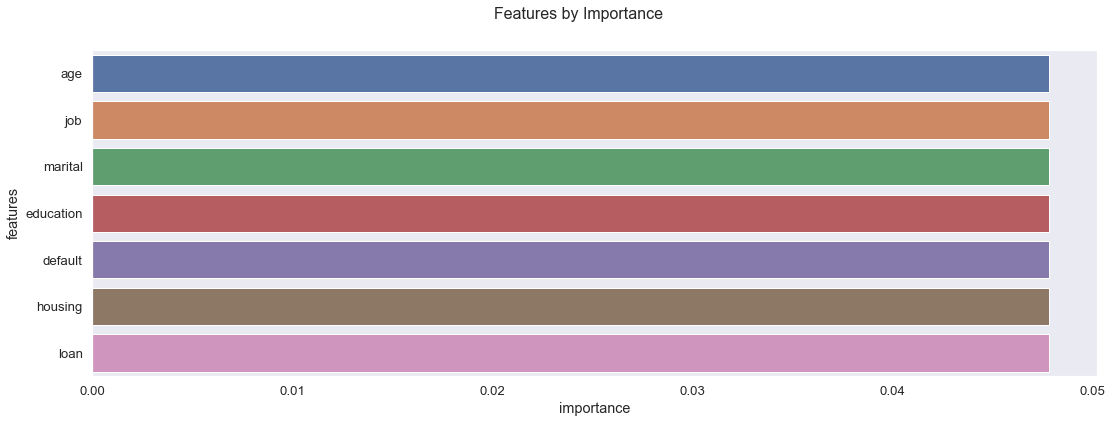

In [409]:
pipeline = Pipeline([('preprocessor',preprocessor),('model',LinearRegression())])
build_and_score_model(pipeline,"Baseline Model - Linear Regression")

While the accuracy score on the above is pretty great, the precision , recall scores on predicted label 1 (yes) is 0 indicating that this is not a very effective model and cannot predict 1 (yes) labels at all. Also all features are seen equal.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [410]:
pipeline = Pipeline([('preprocessor',preprocessor),('model',LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

Train Accuracy Score: 0.89121
Test Accuracy Score: 0.88951
Fit Time: 3.02578s


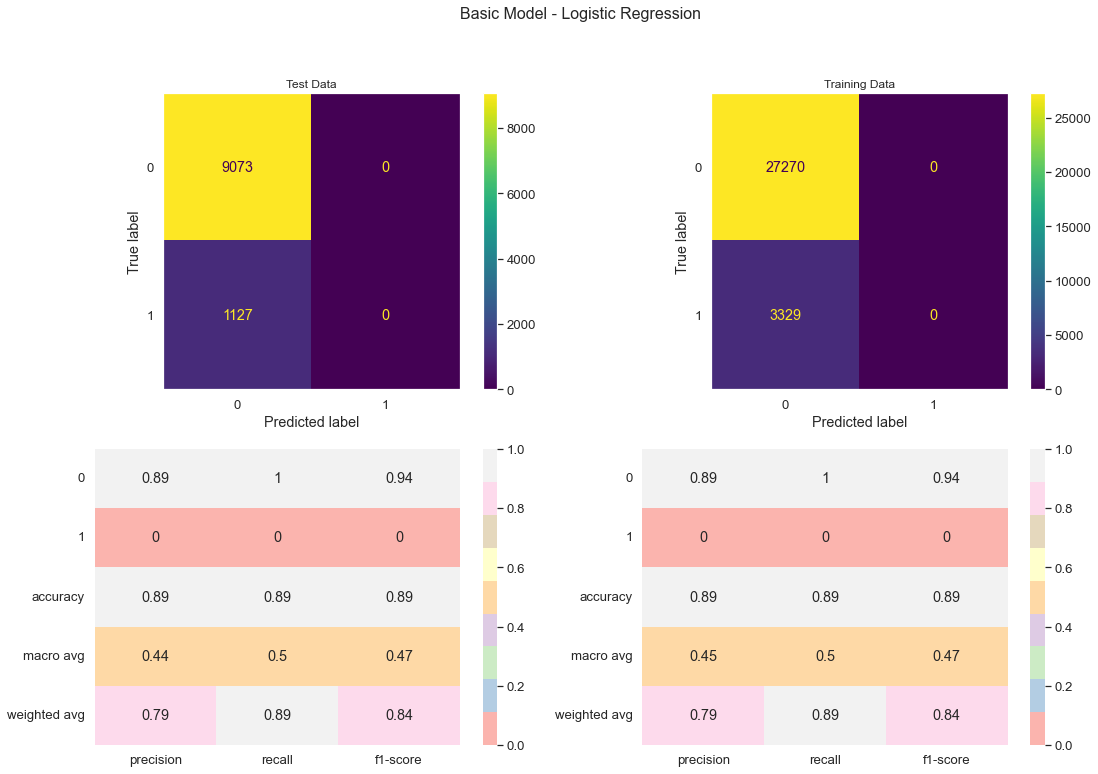

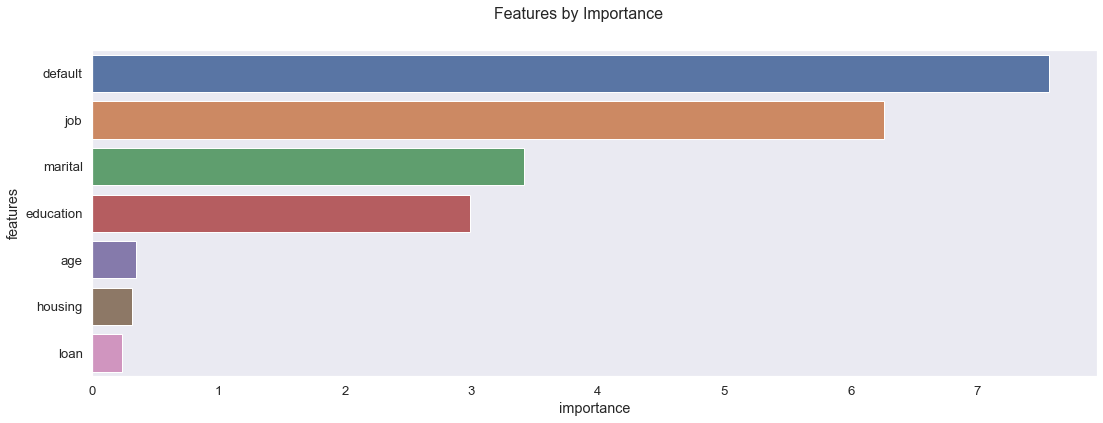

In [411]:
build_and_score_model(pipeline,"Basic Model - Logistic Regression")

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Train Accuracy Score: 0.89088
Test Accuracy Score: 0.87912
Fit Time: 2.78261s


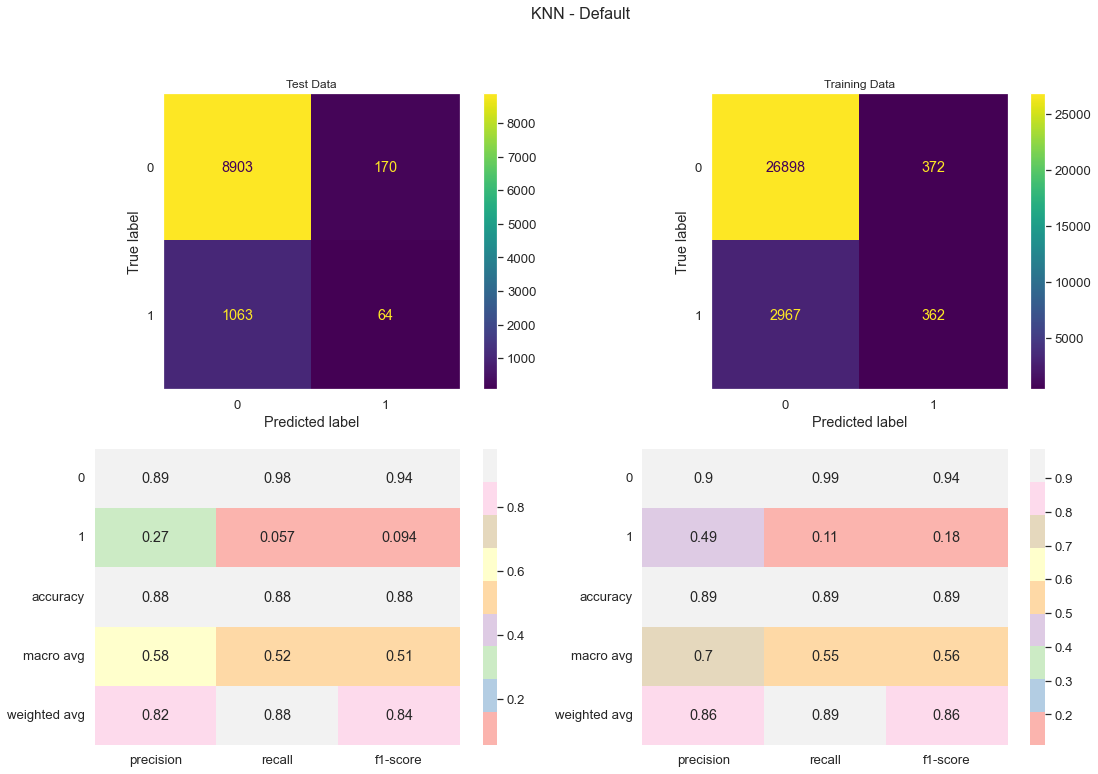

In [412]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([('preprocessor',preprocessor),('model',KNeighborsClassifier())])
build_and_score_model(pipeline,"KNN - Default")

Train Accuracy Score: 0.91019
Test Accuracy Score: 0.86373
Fit Time: 3.17135s


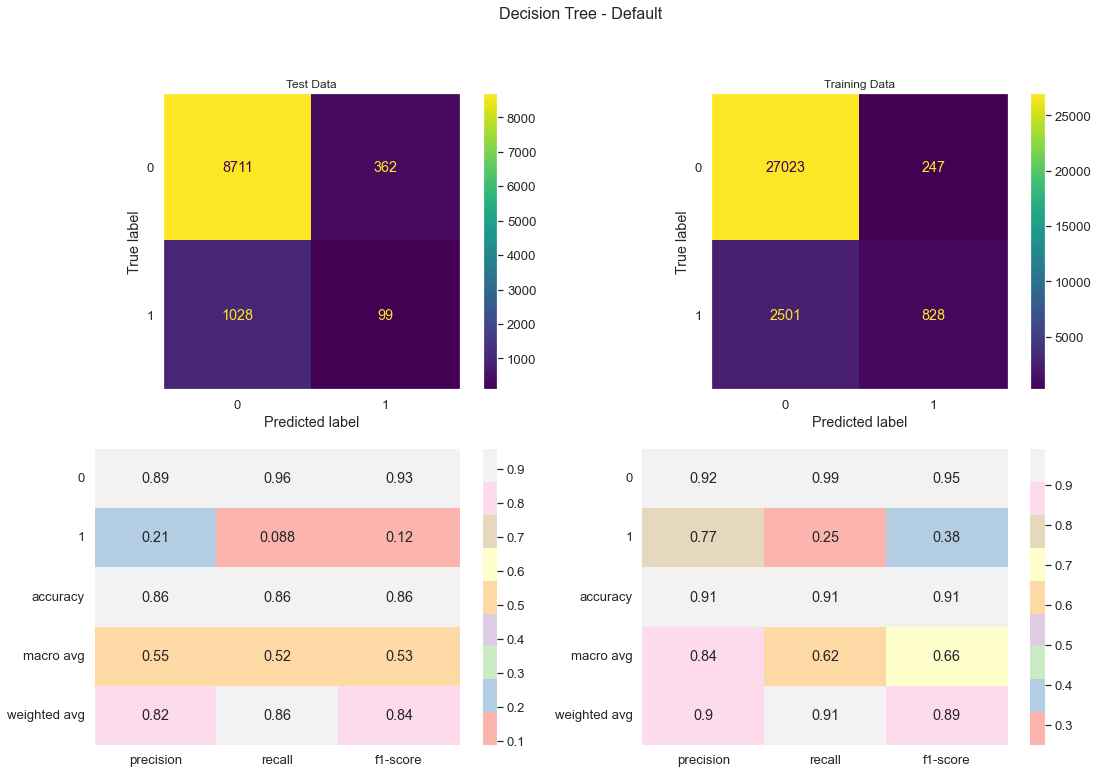

In [413]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([('preprocessor',preprocessor),('model',DecisionTreeClassifier())])
build_and_score_model(pipeline,"Decision Tree - Default")

Train Accuracy Score: 0.89121
Test Accuracy Score: 0.88951
Fit Time: 12.83539s


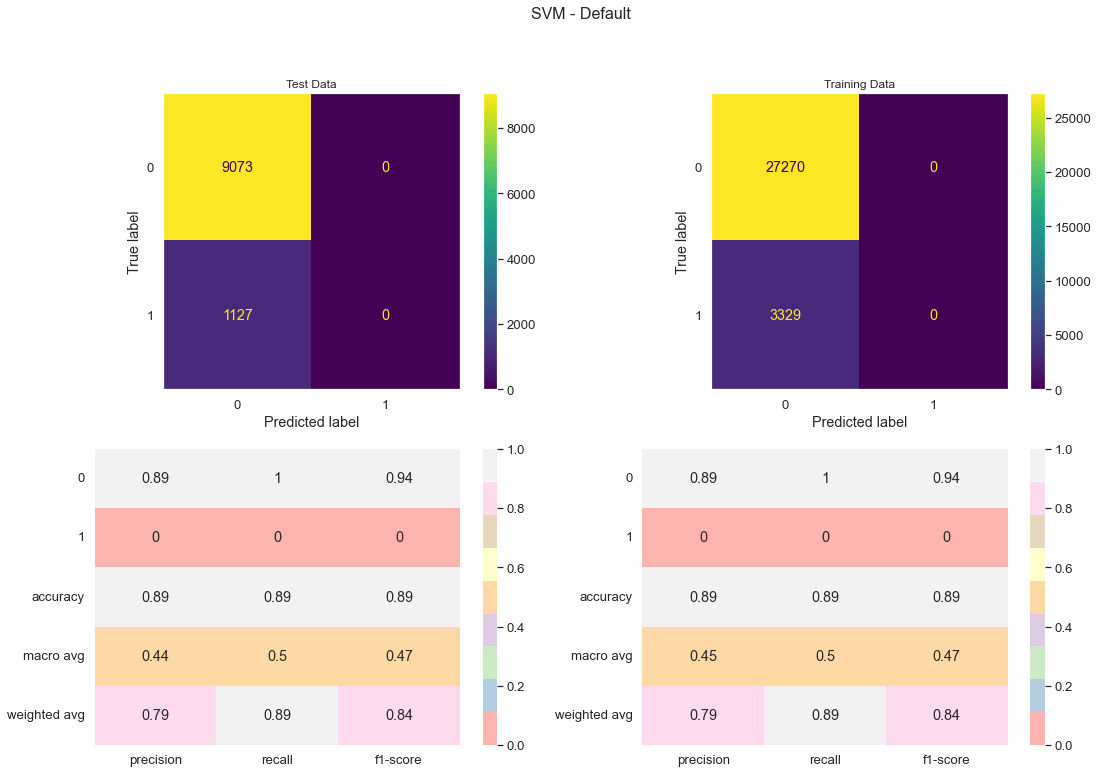

In [414]:
from sklearn.svm import SVC

pipeline = Pipeline([('preprocessor',preprocessor),('model',SVC())])
build_and_score_model(pipeline,"SVM - Default")

In [415]:
df_basic_results = pd.DataFrame({'Model':['Logistic Regression','KNN','Decision Tree','SVM'],                                'Train Time':['3.02578s','2.78261s','3.17135s','12.83539s'],
                                'Train Accuracy':[0.89121,0.89088,0.91019,0.89121],
                                'Test Accuracy': [0.88951,0.87912,0.86373,0.88951]})
df_basic_results.set_index('Model', inplace=True)
                                
df_basic_results

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,3.02578s,0.89121,0.88951
KNN,2.78261s,0.89088,0.87912
Decision Tree,3.17135s,0.91019,0.86373
SVM,12.83539s,0.89121,0.88951


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [529]:
df_bank_info_revised = df.drop(columns=['duration']) # Exclude duration

In [530]:
df_bank_info_revised['y'] = df_bank_info_revised['y'].replace({'yes':1, 'no':0})

#### Remove Multicolinearity

In [531]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def print_vif(df_input):
    numeric_columns = df_input.select_dtypes(include='number').columns
    X = df_input[numeric_columns]
  
    df_vif = pd.DataFrame()
    df_vif["feature"] = X.columns
  
    df_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    return df_vif.sort_values(['VIF'], ascending=False)
    
print_vif(df_bank_info_revised)

,feature,VIF
8,nr.employed,26984.404557
5,cons.price.idx,22871.691061
7,euribor3m,226.228319
6,cons.conf.idx,120.579283
2,pdays,46.254368
4,emp.var.rate,28.948708
0,age,16.049256
3,previous,2.005039
1,campaign,1.913119
9,y,1.369720


In [532]:
df_bank_info_revised.drop(columns=['nr.employed','cons.price.idx'], inplace=True) # Reduce Multicolinearity
print_vif(df_bank_info_revised)

,feature,VIF
6,euribor3m,54.609187
5,cons.conf.idx,44.641492
2,pdays,42.986736
0,age,14.820209
4,emp.var.rate,11.008613
1,campaign,1.903554
3,previous,1.801117
7,y,1.292263


In [533]:
df_bank_info_revised.drop(columns=['euribor3m','cons.conf.idx','pdays'], inplace=True) # Reduce Multicolinearity
print_vif(df_bank_info_revised)

,feature,VIF
0,age,2.052317
1,campaign,1.807242
2,previous,1.377471
3,emp.var.rate,1.303807
4,y,1.252247


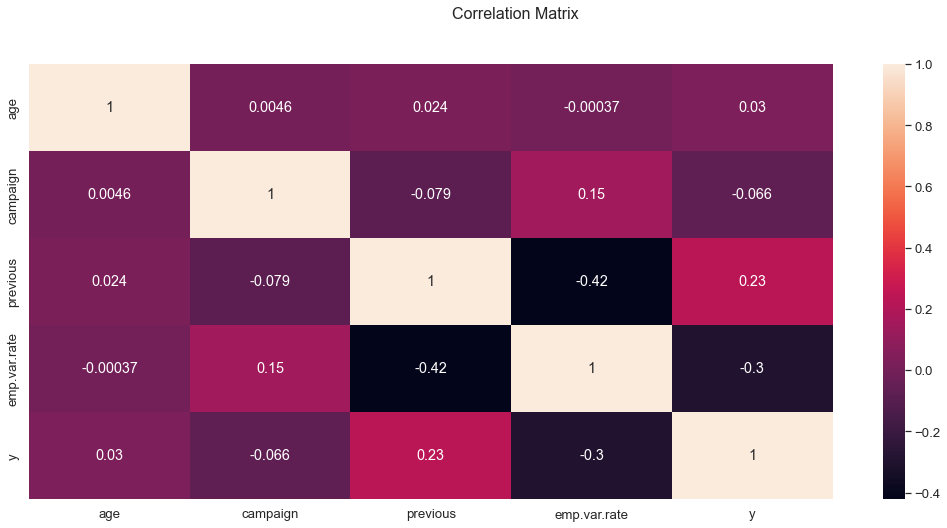

In [534]:
fig, ax = plt.subplots(1, 1,figsize=(18, 8))
fig.suptitle("Correlation Matrix", size=16)

ax.grid(False)
ax.set(xlabel=None, ylabel=None)
sns.heatmap(df_bank_info_revised.corr(), annot=True, ax=ax)

plt.show()
fig.tight_layout()

From the correlation matrix, we can see that previous, emp.var.rate are correlated to the target, lets remove the age and campaign features

In [535]:
df_bank_info_revised.drop(columns=['age','campaign'], inplace=True)

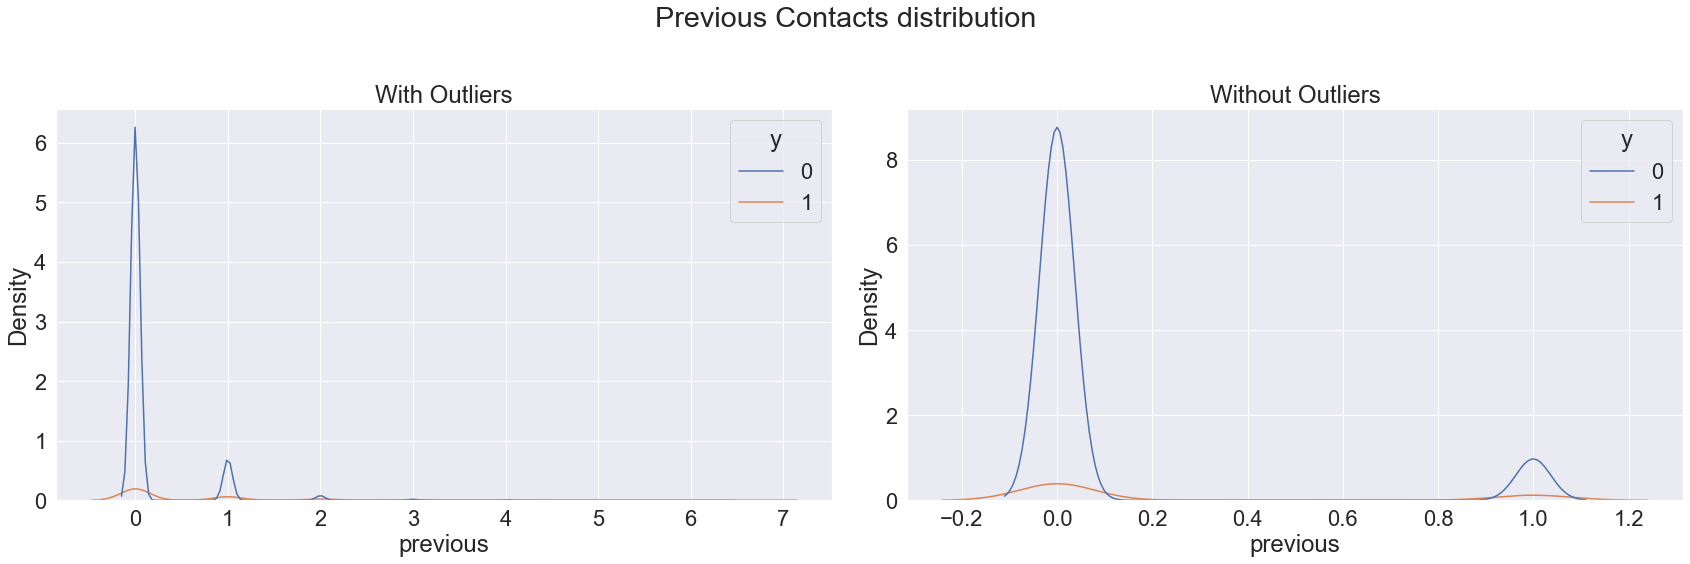

In [536]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('Previous Contacts distribution', y=1.)
    
plot0 = sns.kdeplot(data=df_bank_info_revised,x='previous',hue="y",ax=ax[0])
plot0.set_title('With Outliers')

# Remove outliers 
df_bank_info_revised = df_bank_info_revised[(np.abs(stats.zscore(df_bank_info_revised['previous'])) < 3)]

plot1 = sns.kdeplot(data=df_bank_info_revised,x='previous',hue="y",ax=ax[1])
plot1.set_title('Without Outliers')
fig.tight_layout()

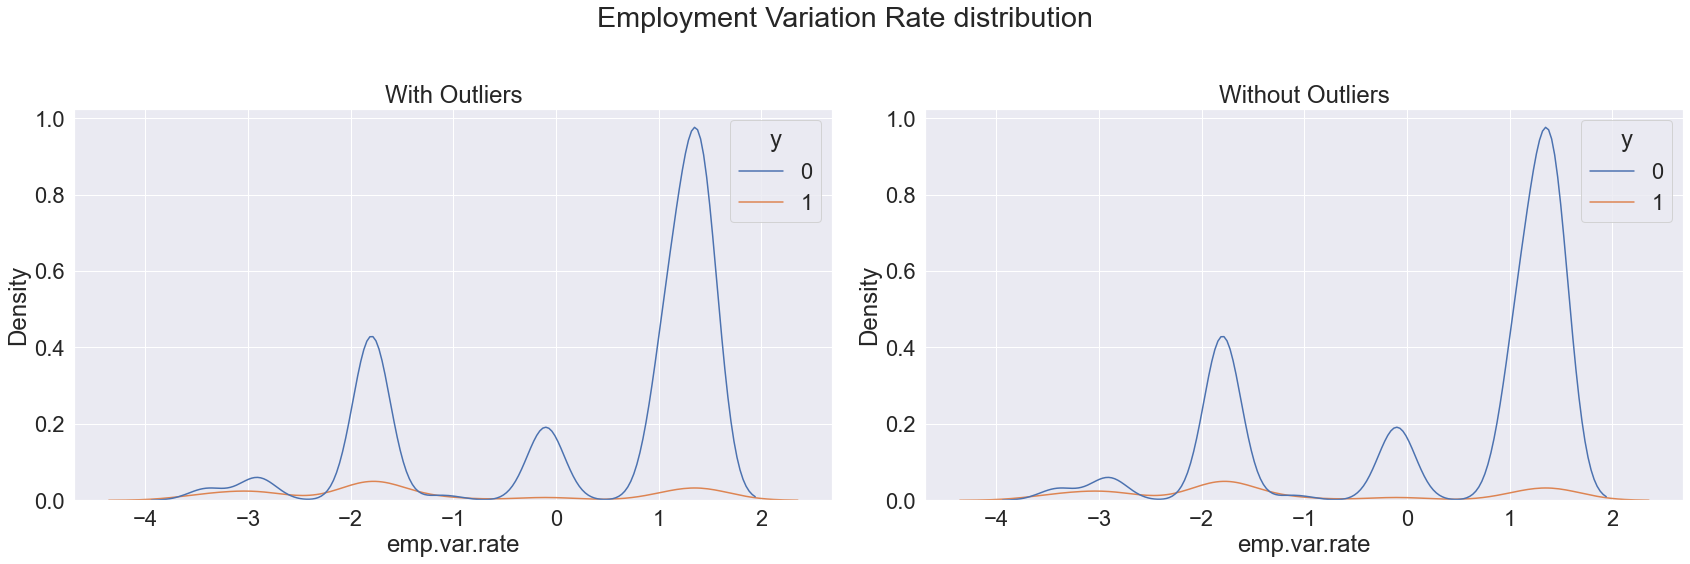

In [537]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('Employment Variation Rate distribution', y=1.)
    
plot0 = sns.kdeplot(data=df_bank_info_revised,x='emp.var.rate',hue="y",ax=ax[0])
plot0.set_title('With Outliers')

# Remove outliers 
df_bank_info_revised = df_bank_info_revised[(np.abs(stats.zscore(df_bank_info_revised['emp.var.rate'])) < 3)]

plot1 = sns.kdeplot(data=df_bank_info_revised,x='emp.var.rate',hue="y",ax=ax[1])
plot1.set_title('Without Outliers')
fig.tight_layout()

#### Engineer Categorical Features

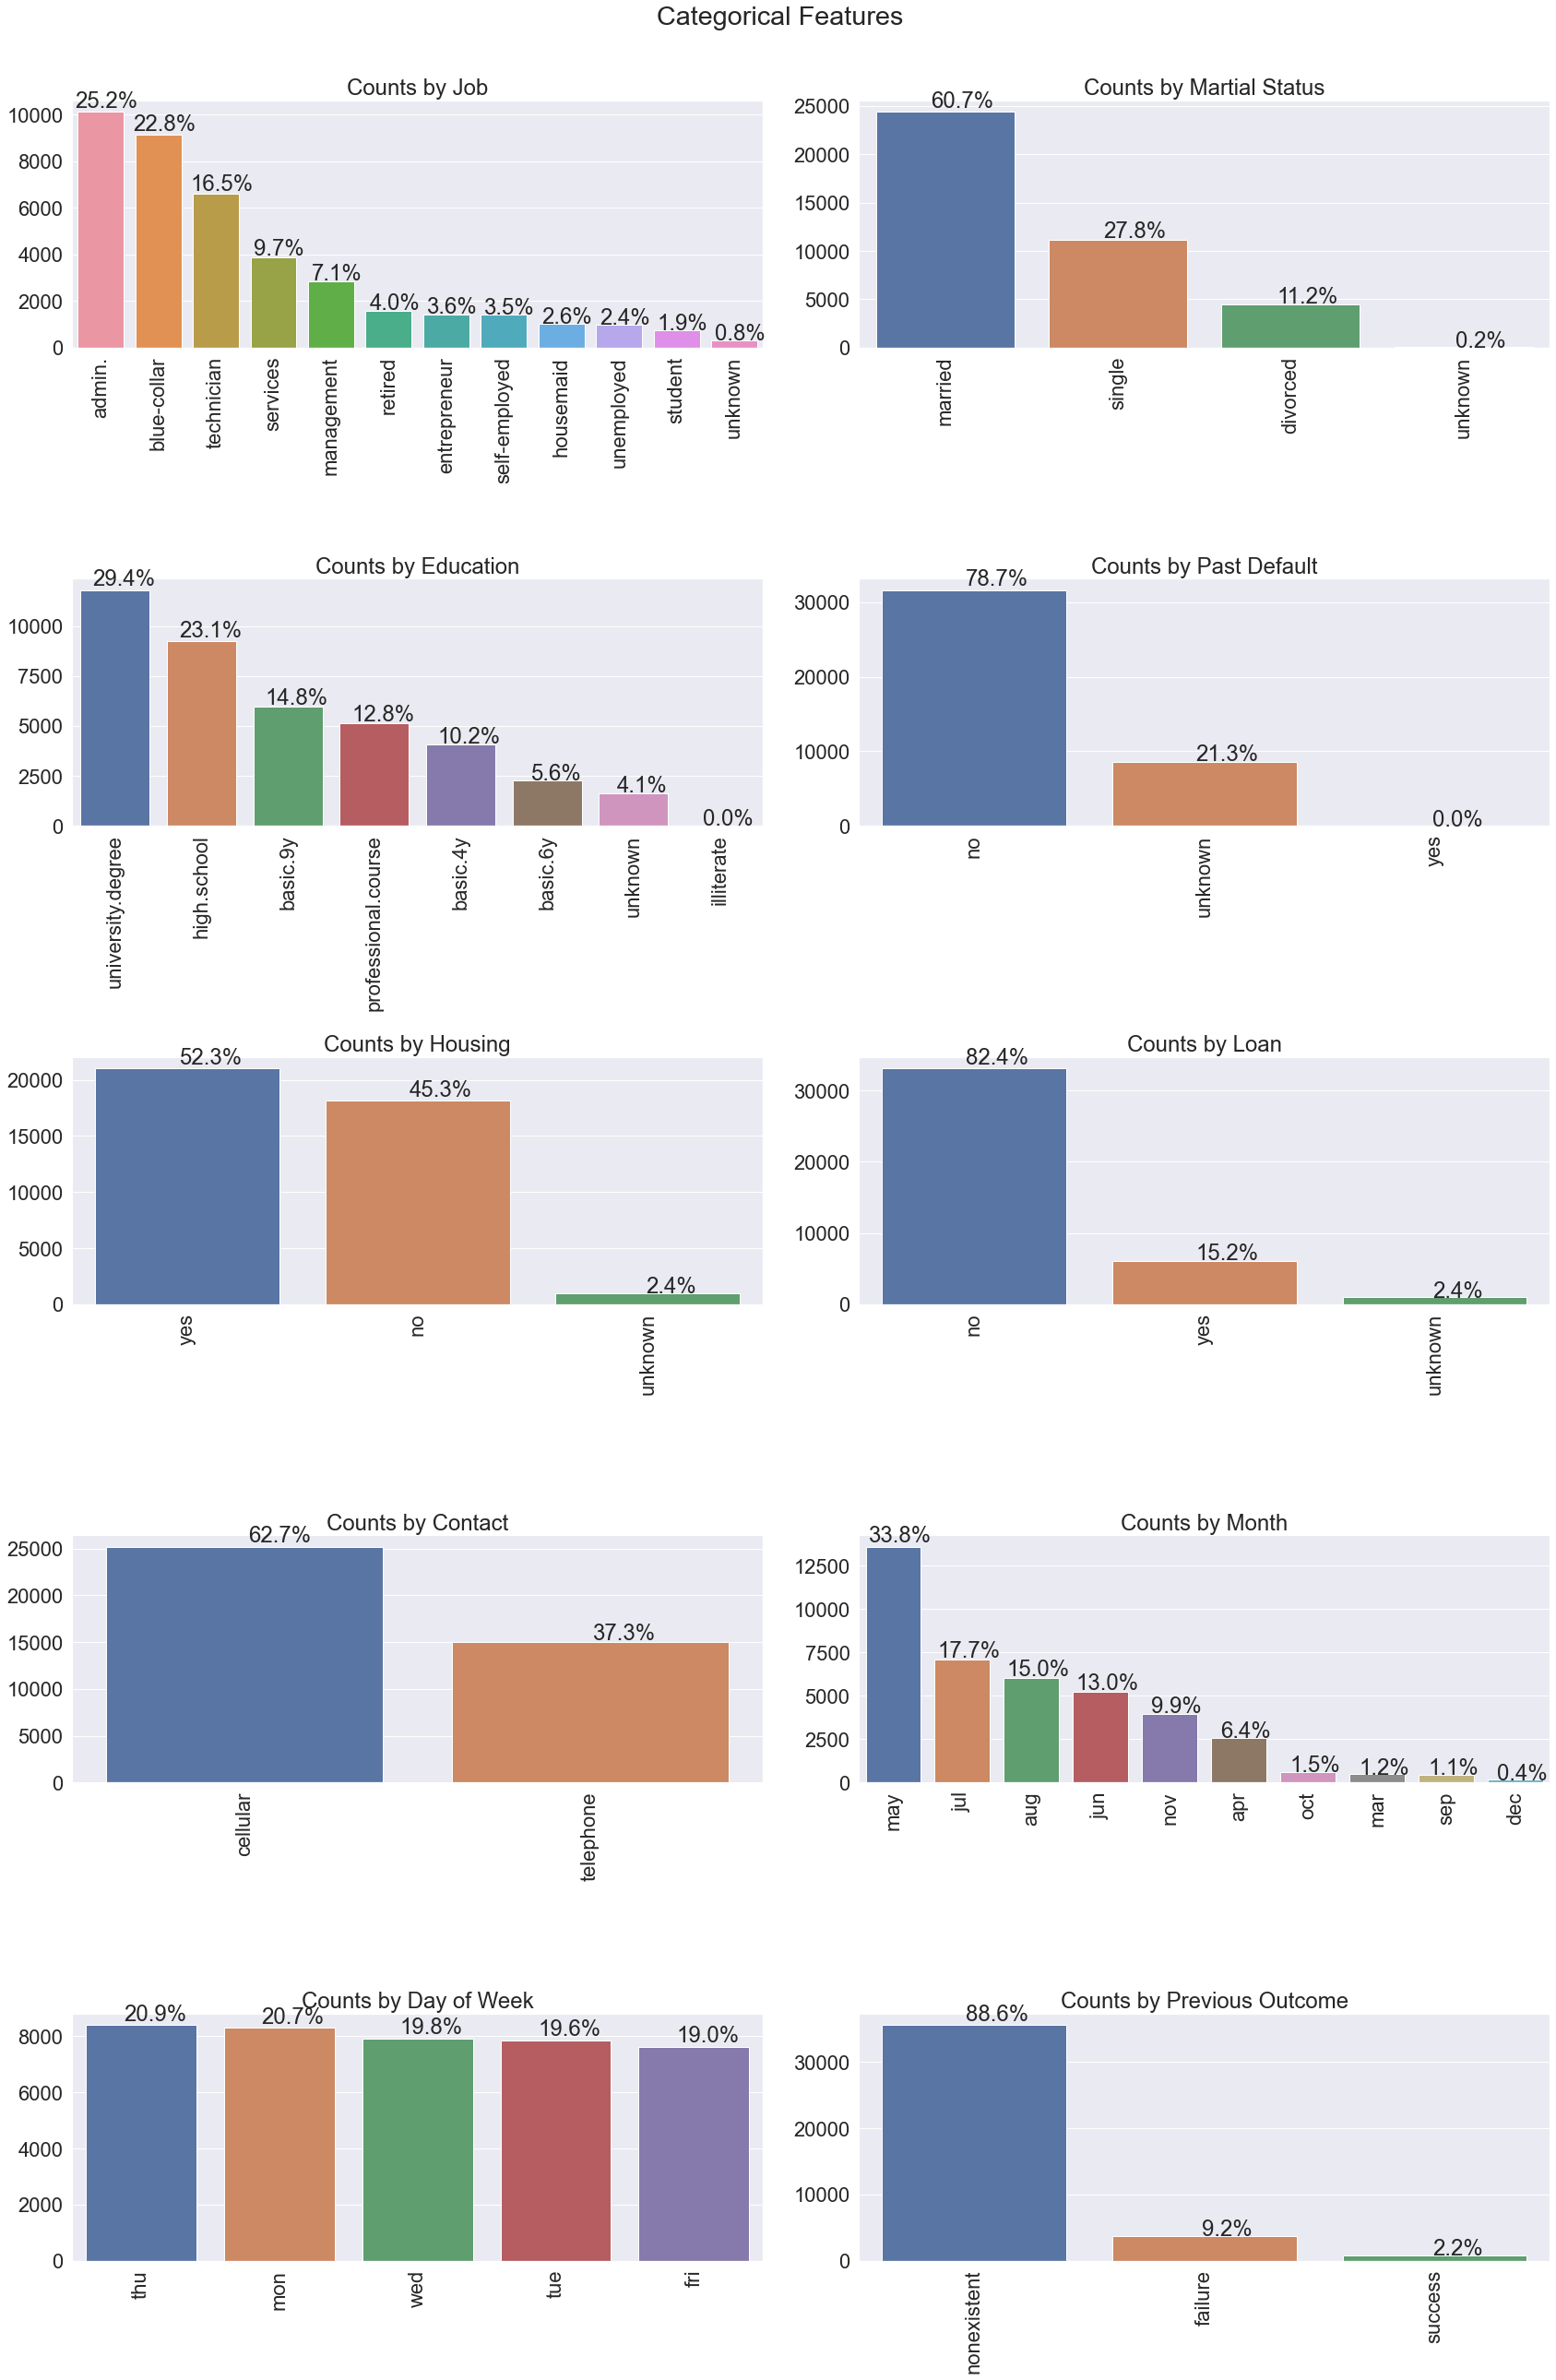

In [539]:
fig, ax = plt.subplots(5, 2, figsize=(24,36))
fig.suptitle('Categorical Features', y=1.)
total = float(len(df_bank_info_revised))

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df_bank_info_revised, ax=ax[plot_x, plot_y], 
                         order = df_bank_info_revised[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.5
        y = p.get_height() + p.get_height() * 0.02
        plot.annotate(percentage,(x, y),ha='center')

add_subplot('job',0,0,"Counts by Job")
add_subplot('marital',0,1,"Counts by Martial Status")
add_subplot('education',1,0,"Counts by Education")
add_subplot('default',1,1,"Counts by Past Default")
add_subplot('housing',2,0,"Counts by Housing")
add_subplot('loan',2,1,"Counts by Loan")
add_subplot('contact',3,0,"Counts by Contact")
add_subplot('month',3,1,"Counts by Month")
add_subplot('day_of_week',4,0,"Counts by Day of Week")
add_subplot('poutcome',4,1,"Counts by Previous Outcome")

fig.tight_layout()

Remove day_of_week as the distribution is more or less equal and previous outcome as most are non-existent

In [540]:
df_bank_info_revised.drop(columns=['day_of_week','poutcome'], inplace=True)

In [541]:
df_bank_info_revised = df_bank_info_revised[~(df_bank_info_revised['education'].isin(['illiterate']))]
df_bank_info_revised = df_bank_info_revised[~(df_bank_info_revised['default'].isin(['yes']))]

for col in ['job','marital','education','housing','loan']:
    df_bank_info_revised[col] = np.where(df_bank_info_revised[col]=='unknown', np.nan, df_bank_info_revised[col]) 

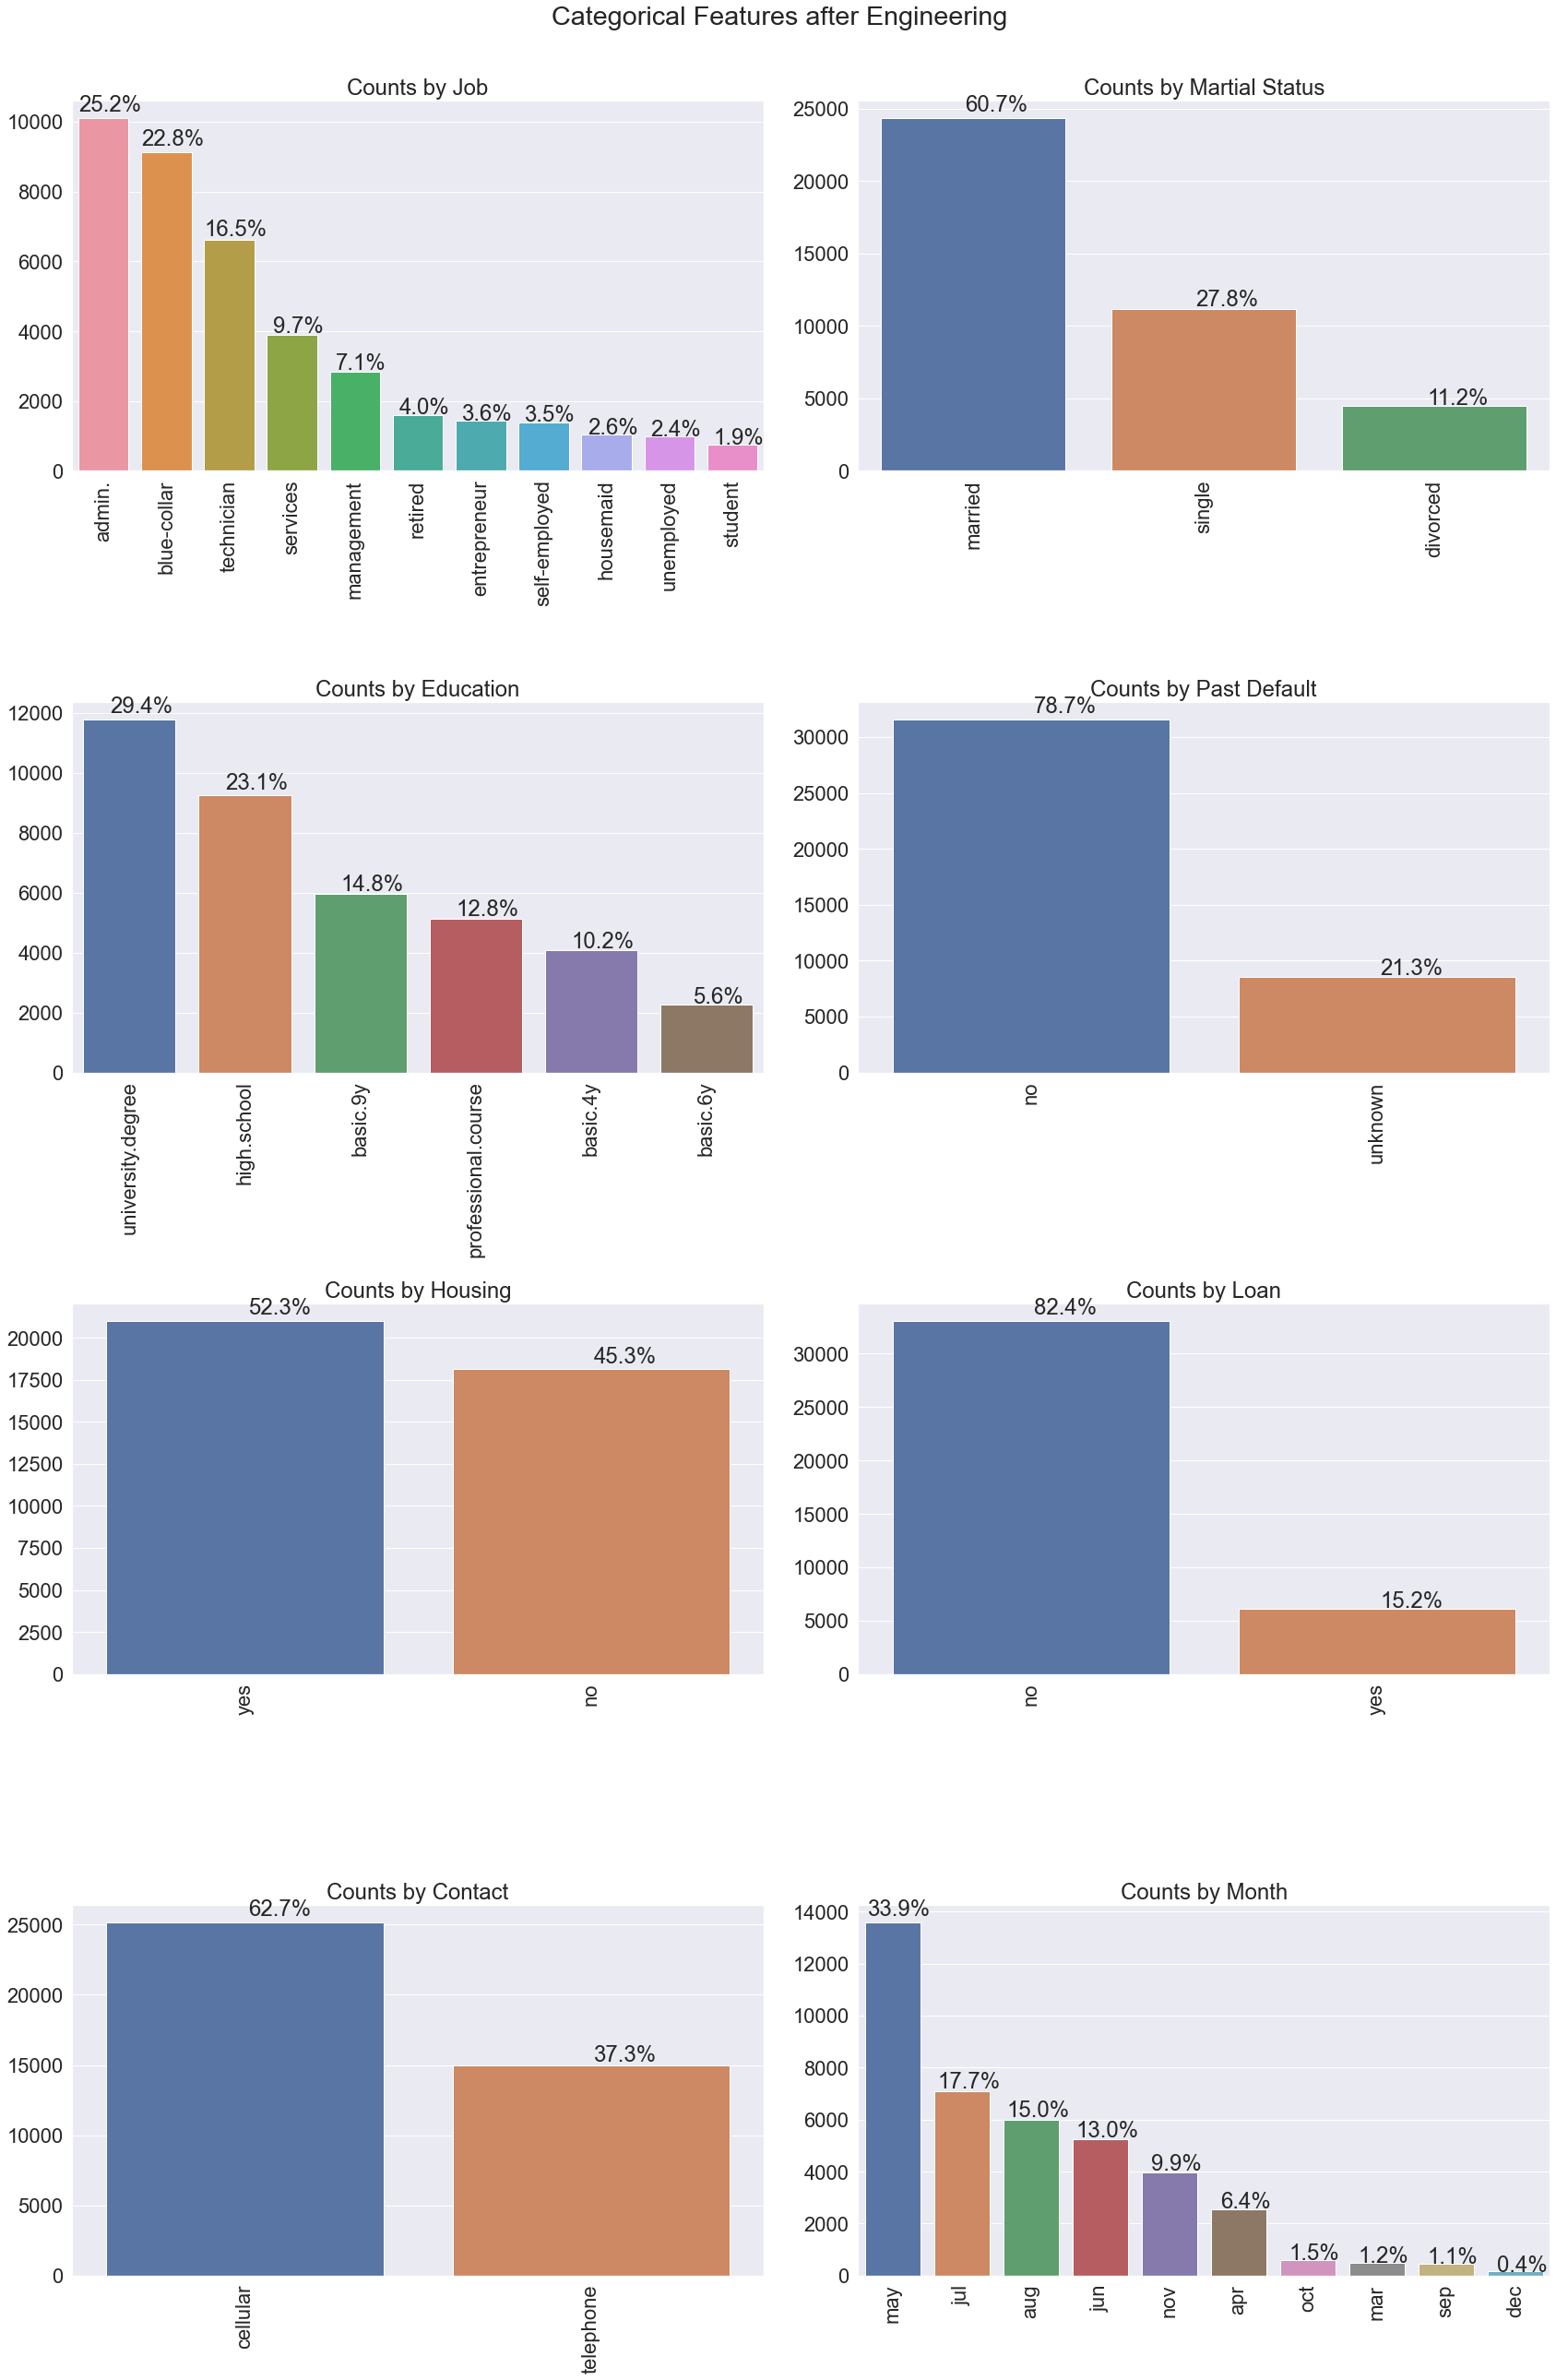

In [542]:
fig, ax = plt.subplots(4, 2, figsize=(24,36))
fig.suptitle('Categorical Features after Engineering', y=1.)
total = float(len(df_bank_info_revised))

add_subplot('job',0,0,"Counts by Job")
add_subplot('marital',0,1,"Counts by Martial Status")
add_subplot('education',1,0,"Counts by Education")
add_subplot('default',1,1,"Counts by Past Default")
add_subplot('housing',2,0,"Counts by Housing")
add_subplot('loan',2,1,"Counts by Loan")
add_subplot('contact',3,0,"Counts by Contact")
add_subplot('month',3,1,"Counts by Month")

fig.tight_layout()

In [483]:
# Train / Test split

X = df_bank_info_revised.drop(columns=['y'])
y = df_bank_info_revised['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

print(f'{df_bank_info_revised.shape}')
print(f'{X_train.shape},{X_test.shape}')
print(f'{y_train.shape},{y_test.shape}')

(40103, 11)
(30077, 10),(10026, 10)
(30077,),(10026,)


In [484]:
numeric_columns = list(X_train.select_dtypes(include='number').columns)
numeric_columns_transformer = Pipeline(
    steps = [
        ('scaler', MinMaxScaler())
    ]
)

object_columns = list(X_train.select_dtypes(include='object').columns)
object_columns_transformer = Pipeline(
    steps = [
        ('encoder', TargetEncoder(handle_unknown='return_nan', handle_missing='return_nan')),
        ('imputer', IterativeImputer(n_nearest_features=3, sample_posterior=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric',numeric_columns_transformer,numeric_columns),
        ('object',object_columns_transformer,object_columns)
    ]
)

In [487]:
from sklearn.model_selection import GridSearchCV

def grid_search_hyperparams(title, pipeline, params):
    print(f'{"-"*30} {title} {"-"*30}')
    grid = GridSearchCV(pipeline, param_grid=params)
    
    start = time.time()
    grid.fit(X_train, y_train)
    stop = time.time()
    
    y_pred_train = grid.best_estimator_.predict(X_train)
    y_pred = grid.best_estimator_.predict(X_test)
    
    print('Train Accuracy Score: %0.5f' % accuracy_score(y_train, y_pred_train))
    print('Test Accuracy Score: %0.5f' % accuracy_score(y_test, y_pred))
    print('Grid Search Time: %0.5fs' % (stop-start))
    print(f'Best Params: {grid.best_params_}')
    sns.set(font_scale = 1.2)
    
    # plot the confusion matrix 
    fig, ax = plt.subplots(2, 2,figsize=(18, 12))
    fig.suptitle(title, size=16)

    ax[0][0].set_title("Test Data", size=12)
    ax[0][0].grid(False)
    ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred,ax=ax[0][0])

    ax[0][1].set_title("Training Data", size=12)
    ax[0][1].grid(False)
    ConfusionMatrixDisplay.from_predictions(y_true=y_train,y_pred=y_pred_train,ax=ax[0][1])
    
    ax[1][0].grid(False)
    sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).iloc[:-1, :].T, 
                cmap='Pastel1', annot=True, ax=ax[1][0])
    
    ax[1][1].grid(False)
    sns.heatmap(pd.DataFrame(classification_report(y_train, y_pred_train,output_dict=True)).iloc[:-1, :].T, 
                cmap='Pastel1', annot=True, ax=ax[1][1])
    plt.show()
    
    plt.show()
    fig.tight_layout()

------------------------------ Logistic Regression - Grid Search CV ------------------------------
Train Accuracy Score: 0.89753
Test Accuracy Score: 0.89677
Grid Search Time: 1294.58633s
Best Params: {'model__C': 0.1111111111111111, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}


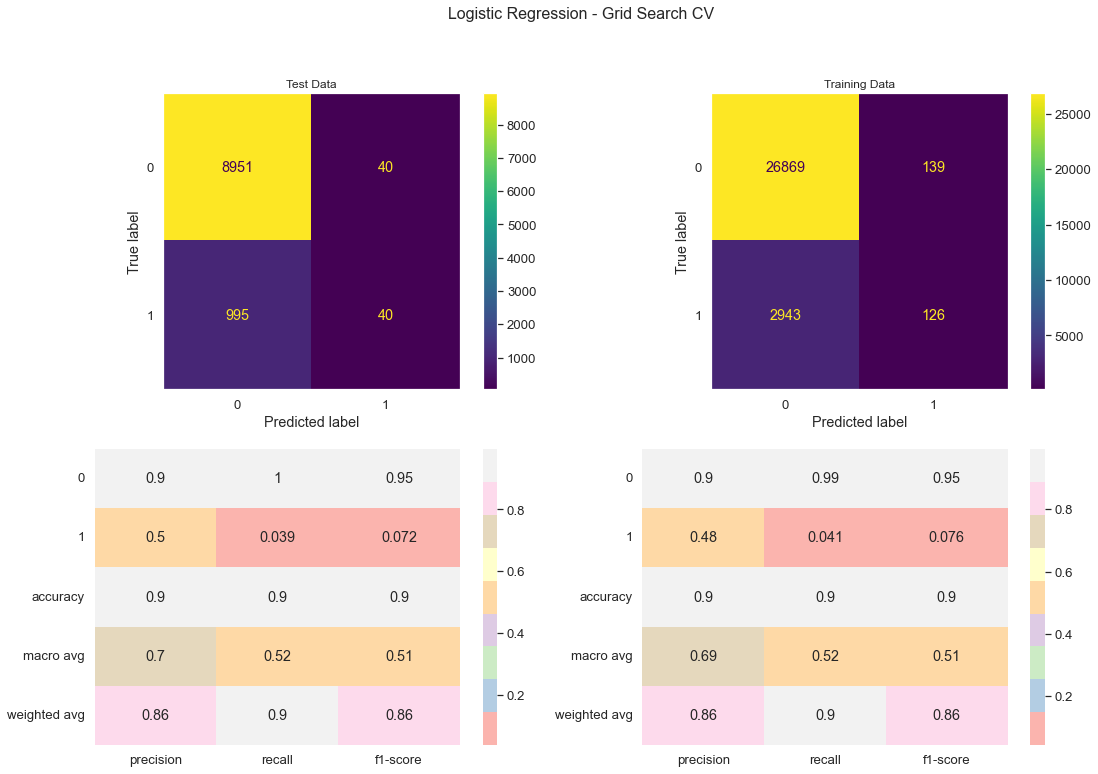

In [488]:
params = {
    'model__penalty': ['l1','l2','elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'model__C': np.linspace(0,1.0,10)
} 

pipeline = Pipeline([('preprocessor',preprocessor),('model',LogisticRegression())])
grid_search_hyperparams("Logistic Regression - Grid Search CV", pipeline, params)

------------------------------ KNN - Grid Search CV ------------------------------
Train Accuracy Score: 0.89893
Test Accuracy Score: 0.89836
Grid Search Time: 1276.27848s
Best Params: {'model__metric': 'euclidean', 'model__n_neighbors': 78, 'model__p': 2, 'model__weights': 'uniform'}


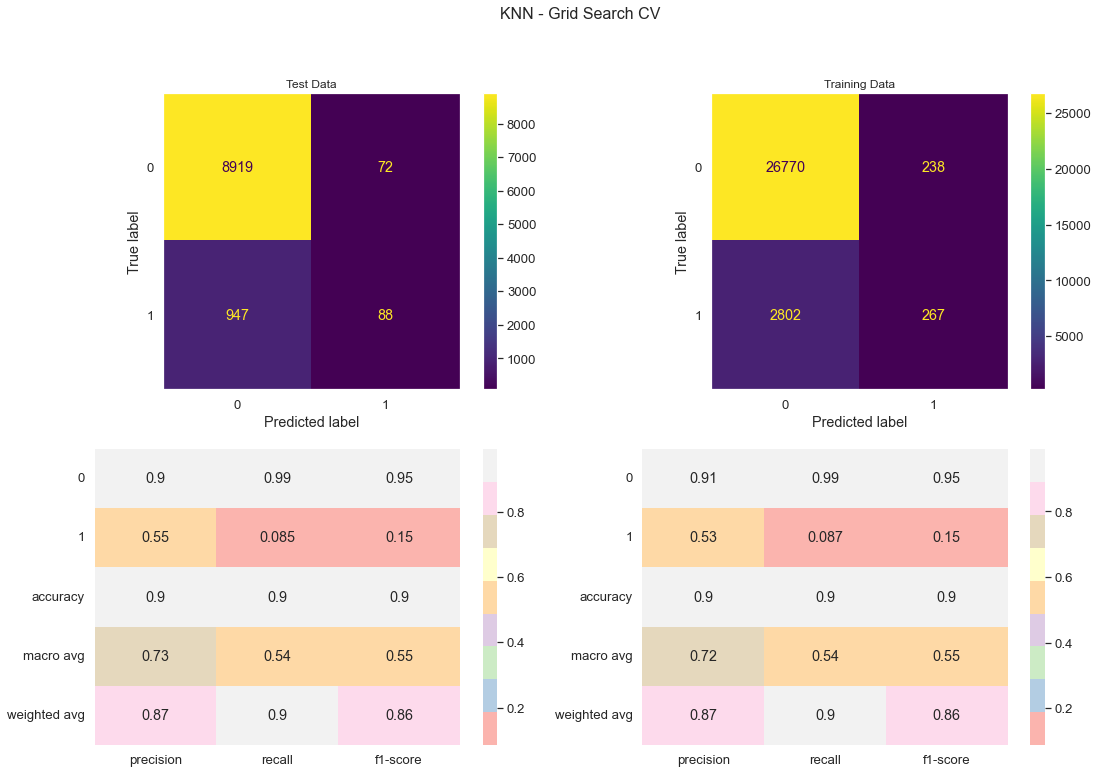

In [492]:
params =  {'model__n_neighbors': np.linspace(1,100,10,dtype = int,),
               'model__weights':['uniform', 'distance'],
               'model__p': [1,2],
               'model__metric': ['euclidean','manhattan']} 

pipeline = Pipeline([('preprocessor',preprocessor),('model',KNeighborsClassifier())])
grid_search_hyperparams("KNN - Grid Search CV", pipeline, params)

------------------------------ Decision Tree - Grid Search CV ------------------------------
Train Accuracy Score: 0.90494
Test Accuracy Score: 0.89807
Grid Search Time: 1165.81784s
Best Params: {'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__splitter': 'best'}


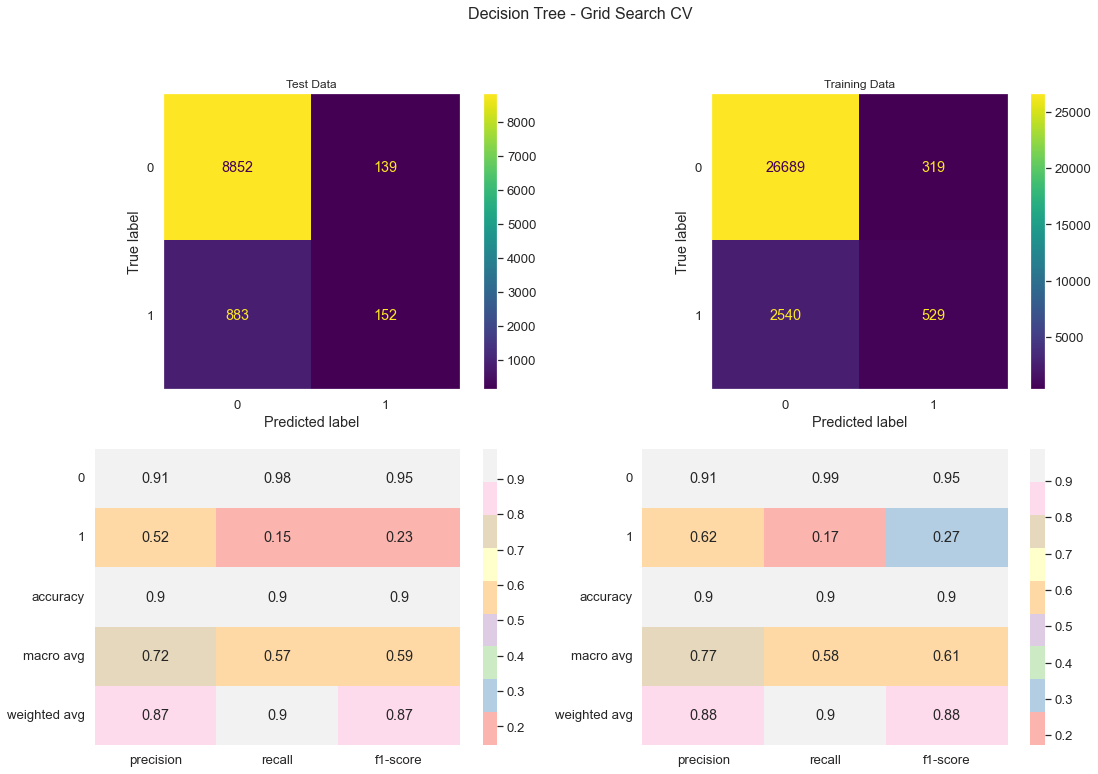

In [496]:
params =  {'model__criterion': ['gini', 'entropy', 'log_loss'],
           'model__max_depth': [None, 10, 12, 14, 16, 18, 20],
           'model__splitter': ['best', 'random'],
           'model__max_features': ['sqrt', 'log2']
          }

pipeline = Pipeline([('preprocessor',preprocessor),('model',DecisionTreeClassifier())])
grid_search_hyperparams("Decision Tree - Grid Search CV", pipeline, params)

------------------------------ SVM - Grid Search CV ------------------------------
Train Accuracy Score: 0.89896
Test Accuracy Score: 0.89787
Grid Search Time: 3343.63520s
Best Params: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'poly'}


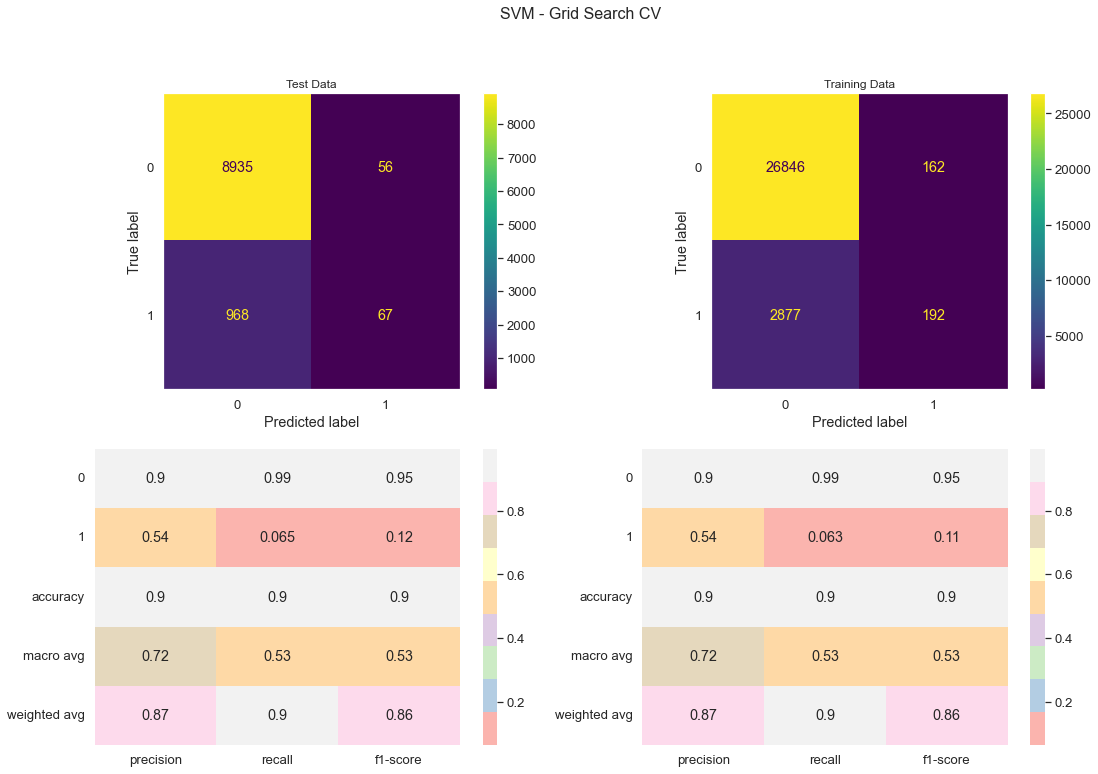

In [498]:
params =  {
           'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
           'model__gamma': ['scale', 'auto'],
           'model__C':[0.1, 1, 10, 100]
          }

pipeline = Pipeline([('preprocessor',preprocessor),('model',SVC())])
grid_search_hyperparams("SVM - Grid Search CV", pipeline, params)

Consolidating results from best hyperparameter search in each model we end up with the below results. Also given how uneven the class distribution is (large number of actual negatives), F1 score is a better measure, so we should pick a model based on that.

In [512]:

df_tuned_results = pd.DataFrame({'Model':['Logistic Regression','KNN','Decision Tree','SVM'],
                                'Train Accuracy':[0.89753,0.89893,0.90494,0.89896],
                                'Test Accuracy': [0.89677,0.89836,0.89807,0.89787],
                                'Test F1-Score (0)': [0.95,0.95,0.95,0.95],
                                 'Test F1-Score (1)': [0.072,0.15,0.23,0.12],
                                'Best Params': [
                                    "{'model__C': 0.1111111111111111, \
                                    'model__penalty': 'l2', 'model__solver': 'newton-cg'}",
                                    "{'model__metric': 'euclidean', 'model__n_neighbors': 78, 'model__p': 2, 'model__weights': 'uniform'}",
                                    "{'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__splitter': 'best'}",
                                    "{'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'poly'}"
                                ]})
df_tuned_results.set_index('Model', inplace=True)
pd.set_option('display.max_colwidth', 500)
                                
df_tuned_results

,Train Accuracy,Test Accuracy,Test F1-Score (0),Test F1-Score (1),Best Params
Model,,,,,
Logistic Regression,0.89753,0.89677,0.95,0.072,"{'model__C': 0.1111111111111111, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}"
KNN,0.89893,0.89836,0.95,0.150,"{'model__metric': 'euclidean', 'model__n_neighbors': 78, 'model__p': 2, 'model__weights': 'uniform'}"
Decision Tree,0.90494,0.89807,0.95,0.230,"{'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__splitter': 'best'}"
SVM,0.89896,0.89787,0.95,0.120,"{'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'poly'}"


**NOTE**: Efforts to improve the model and optimize hyper parameters is very successful, all models have improved on accuracy, recall and F1 metrics. 

Also **Decision Tree** evolves to be a clear winner as the F1 score for the same is the highest for 'yes' (0.23). Let's use this model to evaluate most important features

Train Accuracy Score: 0.90797
Test Accuracy Score: 0.89816
Fit Time: 3.00051s


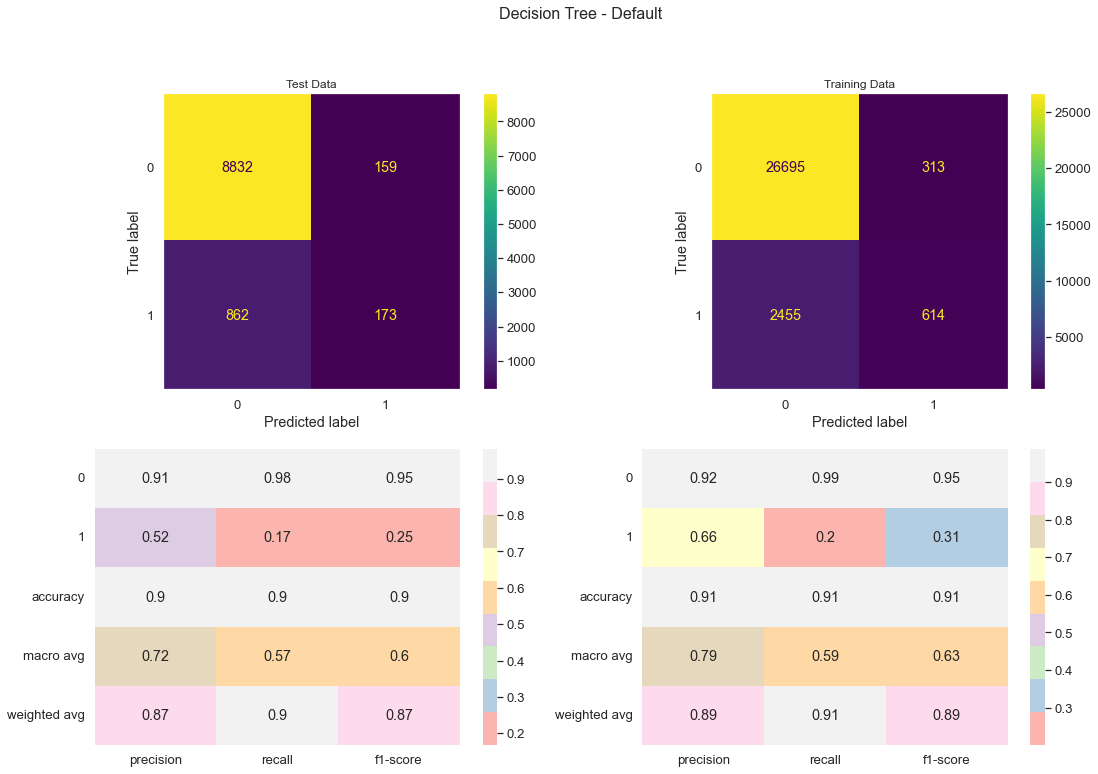

In [519]:
pipeline = Pipeline([('preprocessor',preprocessor),
                     ('model',DecisionTreeClassifier(criterion='gini',max_depth=12, max_features='sqrt', splitter='best'))])
build_and_score_model(pipeline,"Decision Tree - Default")

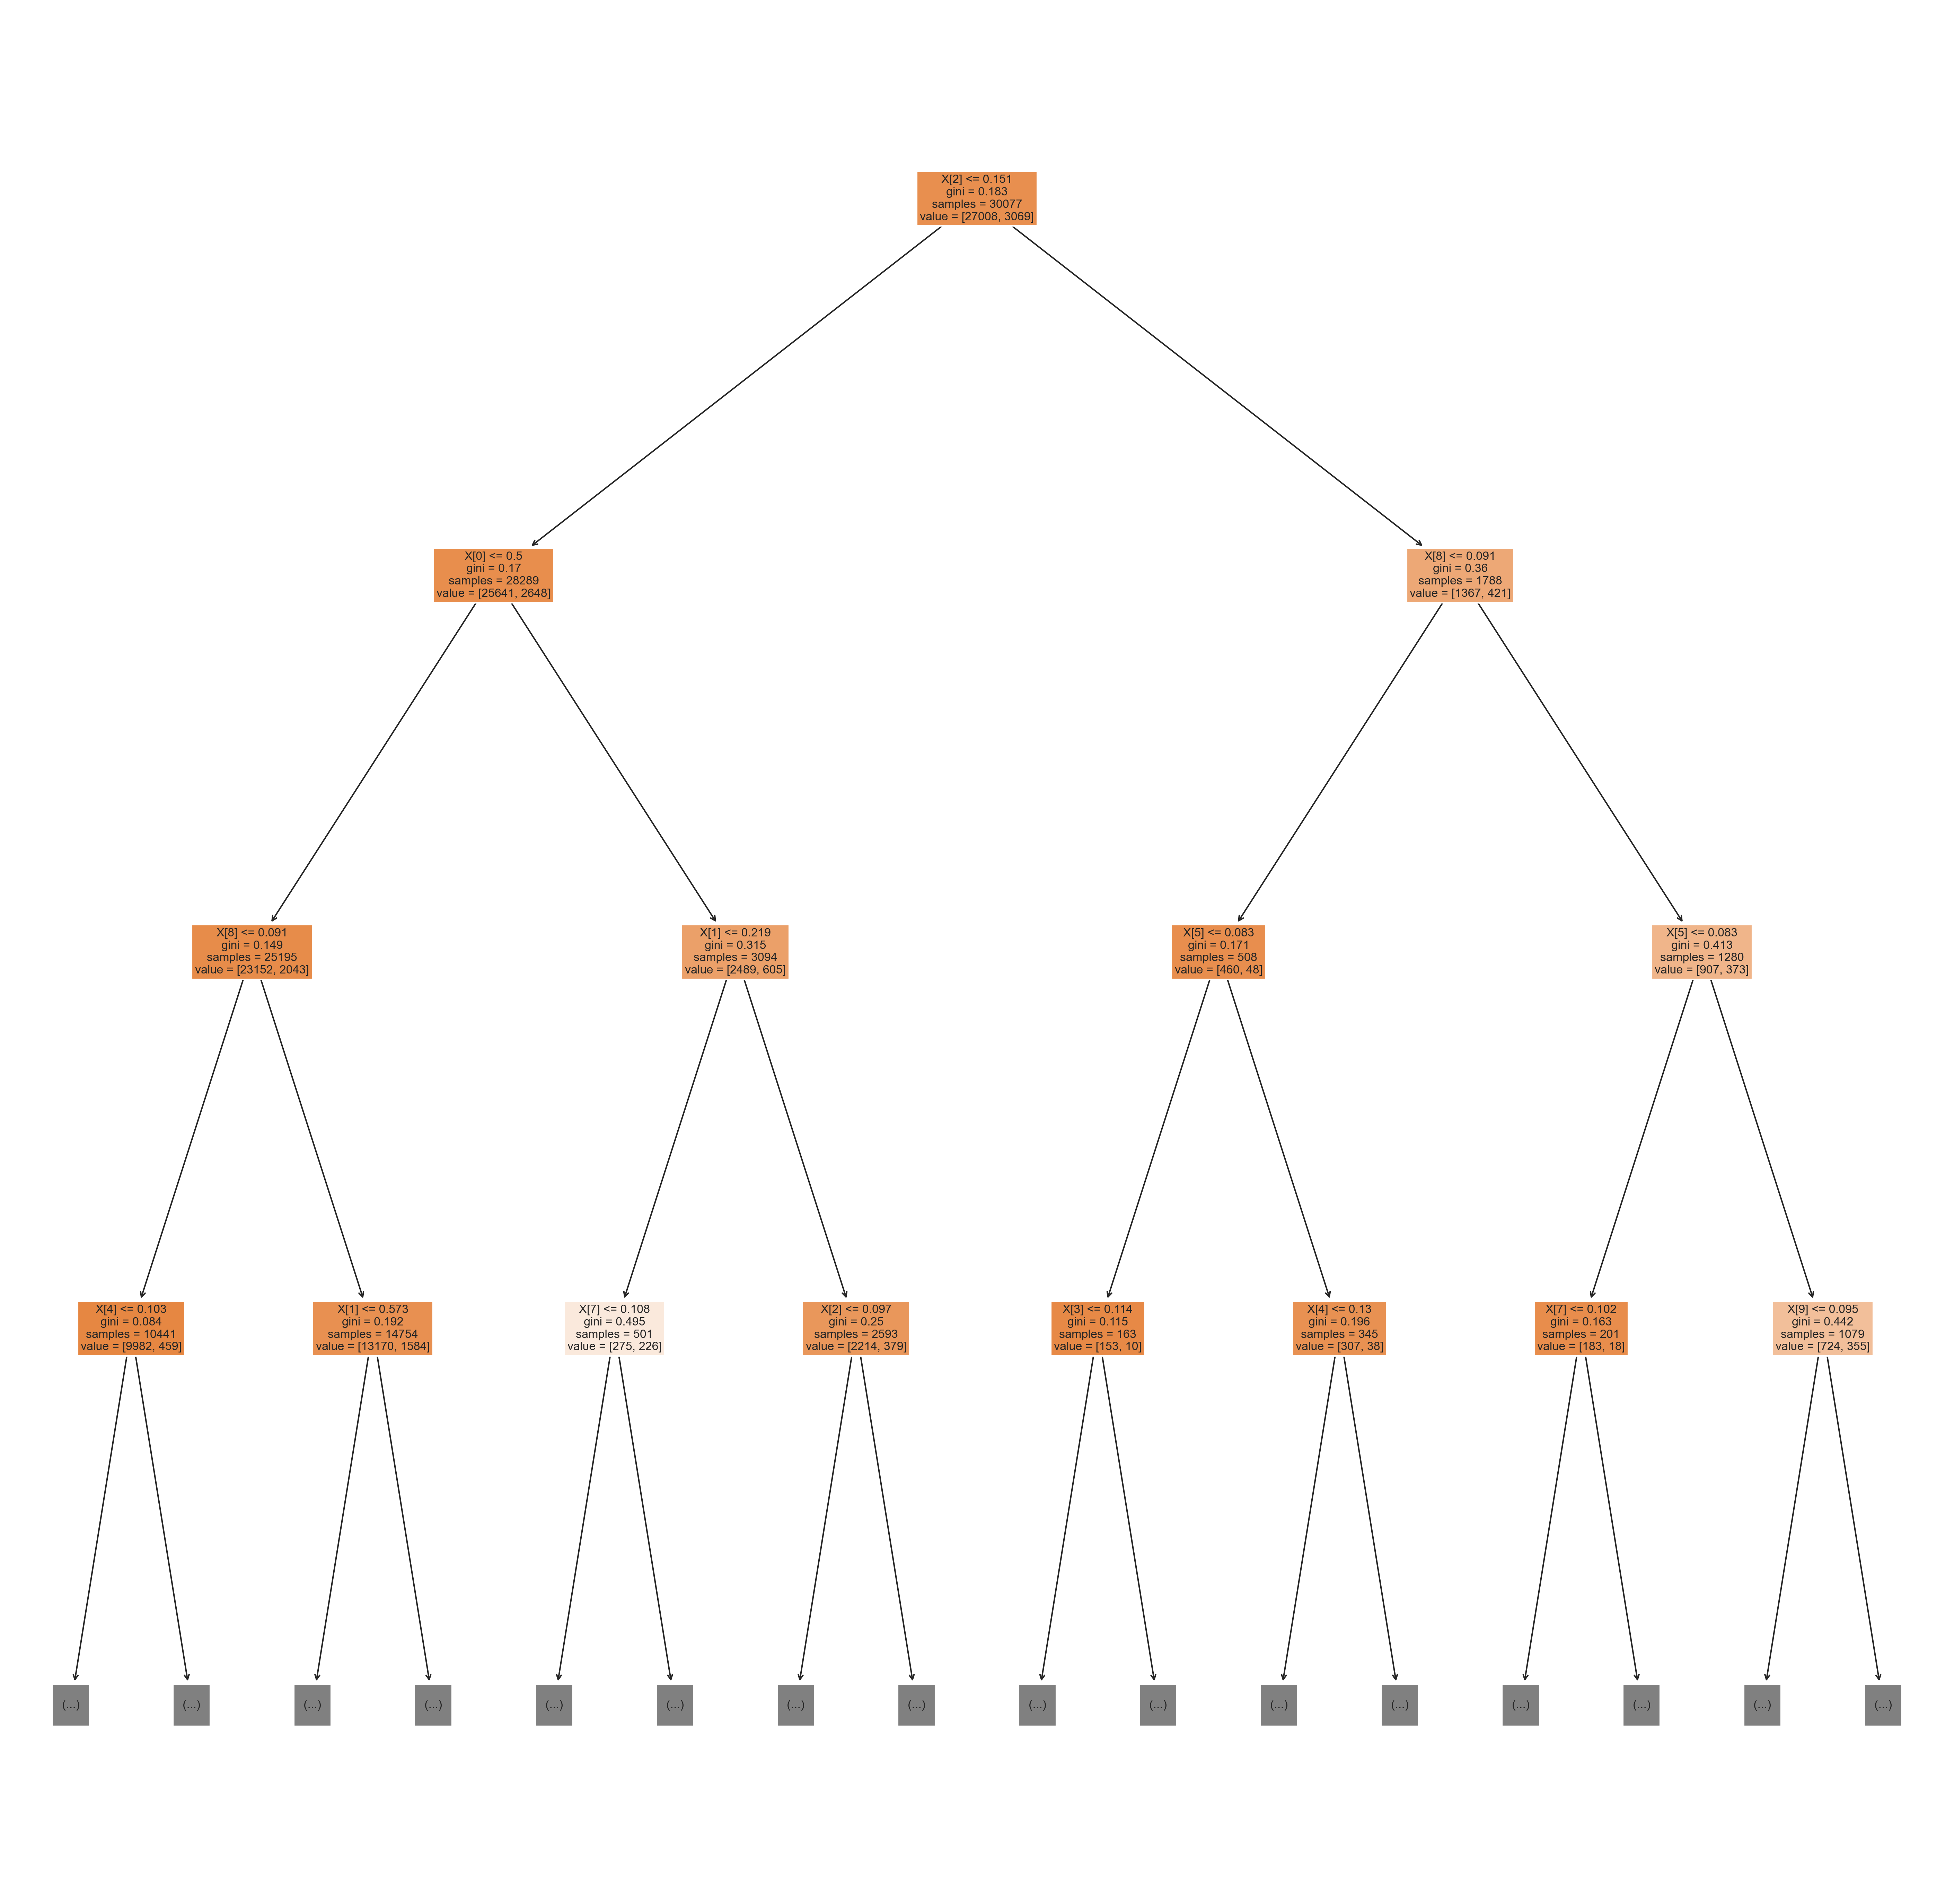

In [525]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,24), dpi=300)
plot_tree(pipeline.named_steps['model'], max_depth =3,
               filled = True);

<AxesSubplot:xlabel='importance', ylabel='features'>

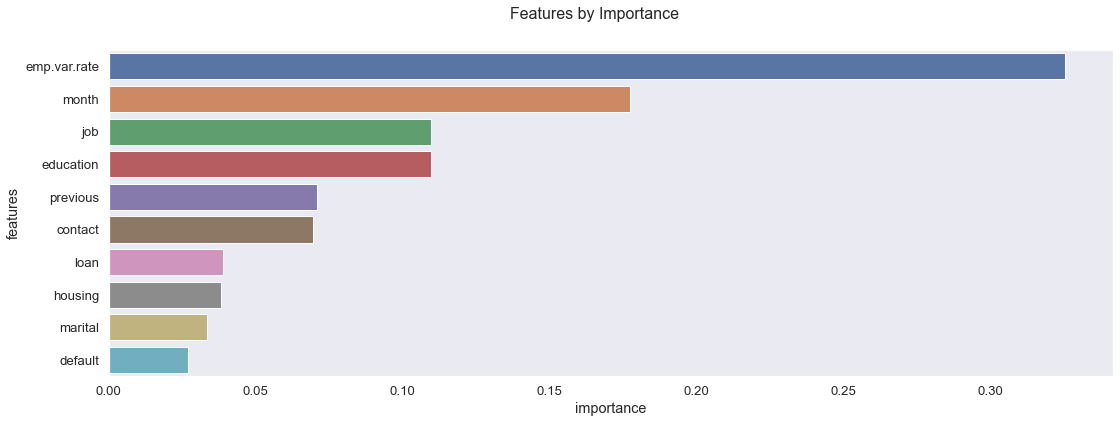

In [527]:
feature_names = list(pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out()) + \
            pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].cols
feature_importances = pd.DataFrame({'features':feature_names,"importance":pipeline.named_steps['model'].feature_importances_})

fig, ax = plt.subplots(1, 1,figsize=(18, 6))
fig.suptitle("Features by Importance", size=16)

ax.grid(False)
ax.set(xlabel=None, ylabel=None)
sns.barplot(data=feature_importances.sort_values('importance',ascending=False), x="importance", y="features", ax=ax)


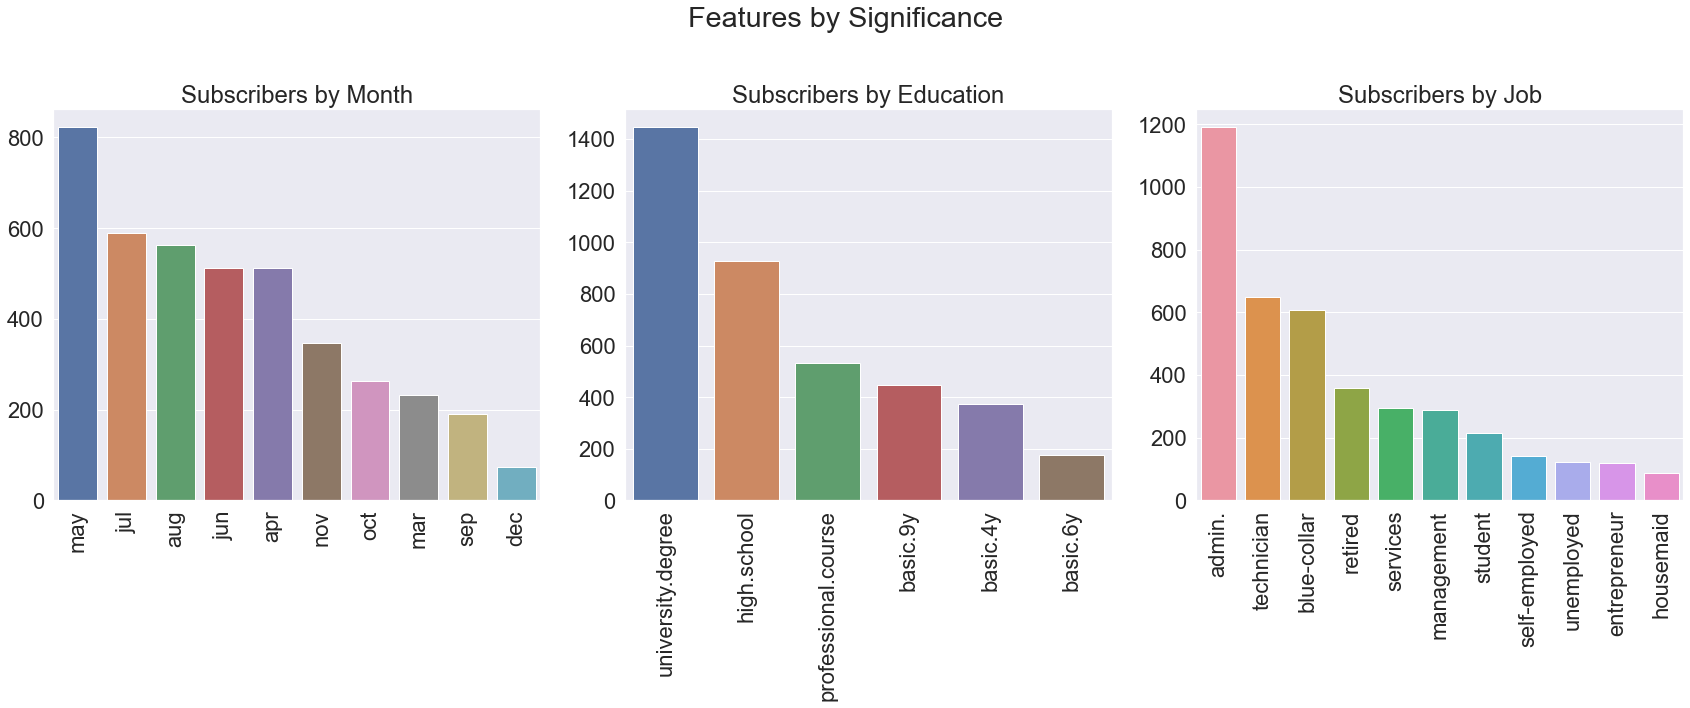

In [557]:
fig, ax = plt.subplots(1, 3, figsize=(24,10))
fig.suptitle('Features by Significance', y=1.)

df_bank_info_filtered =  df_bank_info_revised.loc[(df_bank_info_revised['y'] == 1)]

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df_bank_info_filtered, ax=ax[plot_y], 
                         order = df_bank_info_filtered[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)

add_subplot('month',0,0,"Subscribers by Month")
add_subplot('job',0,2,"Subscribers by Job")
add_subplot('education',0,1,"Subscribers by Education")

fig.tight_layout()

### Findings

Based on the above analysis **Decision Tree Classifier** seems to be the best model for accurately predicting whether a subscriber will respond positively to a campaign for long term deposit 

This model has the best performance metrics with the below hyper parameters

```
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'best'}
```

The most important features that is impactful on the campaign are as shown below

**Employment Variation Rate**: This is an indicator of how many people are hired or fired in a quarterly basis, is a key indicator for the health of a business. Higher this number, lower the possibility of a term deposit as the business is undergoing churn.

**Month**: Month in which we contact the customer has a higher impact, this is most likely because they have greater cash flows during those monthsespecially around quarter ends when there are more cash lying around to invest

**Job** and **Education**: Job and Education has strong correlation with the outcome, with admin jobs and university degree holders willing to invest into term deposit 

#### Next Steps and Recommendations

Based on the above findings newer campaigns should follow these recommendations

* Avoid businesses that have high rate of churn, with more people hired and fired, they have way less cash to carry around
* Target campaigns on certain month that have the highest yeild
* Well educated people are more likely to invest in term deposit
* People in more stable jobs are more likely to invest in term deposit